# Achieving Low Noise in Scanning Tunneling Spectroscopy

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Signal-to-noise-ratio-in-scanning-tunneling-spectroscopy" data-toc-modified-id="Signal-to-noise-ratio-in-scanning-tunneling-spectroscopy-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Signal-to-noise ratio in scanning tunneling spectroscopy</a></span><ul class="toc-item"><li><span><a href="#Tunneling-spectroscopy-with-a-lock-in-amplifier" data-toc-modified-id="Tunneling-spectroscopy-with-a-lock-in-amplifier-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Tunneling spectroscopy with a lock-in amplifier</a></span></li><li><span><a href="#Choice-of-the-low-pass-filter" data-toc-modified-id="Choice-of-the-low-pass-filter-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Choice of the low-pass filter</a></span></li></ul></li><li><span><a href="#Fig.-3" data-toc-modified-id="Fig.-3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fig. 3</a></span></li><li><span><a href="#Fig.-4" data-toc-modified-id="Fig.-4-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fig. 4</a></span></li><li><span><a href="#Fig.-5" data-toc-modified-id="Fig.-5-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Fig. 5</a></span></li><li><span><a href="#Fig.-6" data-toc-modified-id="Fig.-6-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Fig. 6</a></span></li><li><span><a href="#Fig.-7" data-toc-modified-id="Fig.-7-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Fig. 7</a></span></li><li><span><a href="#Fig.-8" data-toc-modified-id="Fig.-8-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Fig. 8</a></span></li><li><span><a href="#Fig.-9" data-toc-modified-id="Fig.-9-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Fig. 9</a></span></li><li><span><a href="#Fig.-10" data-toc-modified-id="Fig.-10-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Fig. 10</a></span></li><li><span><a href="#Fig.-11" data-toc-modified-id="Fig.-11-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Fig. 11</a></span></li><li><span><a href="#Fig.-12" data-toc-modified-id="Fig.-12-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Fig. 12</a></span></li><li><span><a href="#Fig.-13" data-toc-modified-id="Fig.-13-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Fig. 13</a></span></li><li><span><a href="#Fig.-15" data-toc-modified-id="Fig.-15-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Fig. 15</a></span></li><li><span><a href="#Fig.-17-19" data-toc-modified-id="Fig.-17-19-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Fig. 17-19</a></span></li><li><span><a href="#Fig.-20&amp;21" data-toc-modified-id="Fig.-20&amp;21-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Fig. 20&amp;21</a></span></li><li><span><a href="#Fig.-22-23" data-toc-modified-id="Fig.-22-23-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Fig. 22-23</a></span></li><li><span><a href="#Fig.-24" data-toc-modified-id="Fig.-24-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>Fig. 24</a></span></li><li><span><a href="#Fig.-25" data-toc-modified-id="Fig.-25-19"><span class="toc-item-num">19&nbsp;&nbsp;</span>Fig. 25</a></span></li></ul></div>

In [1]:
# %pylab inline
# pylab.style.use('Thin')
%matplotlib inline
import warnings
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.optimize as opt

In [2]:
mpl.rcParams['font.sans-serif']=['Helvetica']
mpl.rcParams['ytick.labelsize']= 8.0
mpl.rcParams['xtick.labelsize']= 8.0
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Helvetica'
mpl.rcParams['mathtext.sf'] = 'Helvetica'
mpl.rcParams['mathtext.it'] = 'Helvetica:italic'
mpl.rcParams['mathtext.bf'] = 'Helvetica:bold'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.direction'] = 'in'

## Introduction 

Scanning tunneling microscopy (STM) measures the net electric current I across a voltage-biased tunnel junction, where a sharp metallic tip is brought into atomic-scale proximity with a sample of interest. In the simplest mode of STM operation, a feedback loop is used to maintain a constant tunneling current, by tracing out the atomic-scale topographical contours of the sample surface. The tunneling current is typically proportional to the energy-integrated density of states (DOS) of the sample surface, thus scanning tunneling spectroscopy (STS) was suggested [1] and carried out [2] soon after the invention of STM. STS measures the differential conductance $g(V ) = dI/dV (V )$ as the energy (eV) is tuned by bias voltage ($V$ ), with resolution reaching the μV range. A spatial map of $g(\mathbf{r},V)$ can be generated by raster scanning $(x,y)$ on the surface and sweeping V at each pixel.

Momentum resolution can be achieved by Fourier transform (FT) of a map where surface imperfections cause quasiparticle scattering, yielding DOS as a function of in-plane momentum and energy $\widetilde{g}(\mathbf{q}, V)$ [3,4]. Here the momentum $\mathbf{q}$ is the difference of initial and final momenta  $\mathbf{k}_\mathrm{i}$ and $\mathbf{k}_\mathrm{f}$ of a scattered quasiparticle. This technique, referred to as quasiparticle interference (QPI) imaging, enables observation of the local electronic band structure of the crystal surface. QPI imaging has been widely implemented in condensed matter physics research, for instance in high-temperature superconductivity, [5–8] heavy fermion compounds, [9–11] graphene, [12] and topological materials. [13–16] While direct observation of surface electronic band structure is achievable by angle-resolved photoemission spectroscopy (ARPES), it is typically limited to occupied states (unless a delicate optical pump-probe setup is implemented [17–19]), and its spatial resolution is restricted by its optical wavelength (a few hundred nanometers). As a consequence, ARPES may inadvertently average multiple band structure signals from different domains or phases. On the other hand, QPI imaging can achieve spatial resolution down to the Fermi wavelength (typically a few nanometers), and can access unoccupied states simply by applying a positive sample bias voltage. Moreover, QPI can be used to image band structure dependence on magnetic field, which is impossible with ARPES.

Time is the major limiting factor for QPI imaging with a high resolution in momentum space. First, large real space area is required to maximize the momentum resolution. Momentum resolution in ARPES is on the order of $10^{−2}$ Å$^{−1}$, [20,21] which equates to around 70 nm in real space. Second, high spatial resolution is required to compensate for the inevitable thermal drift caused by minute, time-dependent temperature gradients between tip and sample. Thermal drift leads to offsets in the spatial registration of individual spectra, which degrades the momentum resolution. If the drift is
2
less than ∼ 1 Å/hr, and the image is acquired with atomic resolution in real space, then the Bragg peaks in the FT can serve as an exact length reference to correct the in-plane drift down to the picometer scale. [22,23]

For example, in order to achieve a momentum resolution of $10^{−2}$ Å$^{−1}$, a 256 × 256 grid on a $\sim$ 70 nm × 70 nm area is necessary to obtain atomic resolution (in-plane lattice constant is 3$\sim$6 A ̊ for common materials). To obtain 1 meV energy resolution in a 0.1 eV energy window then requires 256 × 256 × 100 = 6.55 × $10^6$ distinct measurements. As the holding time of a cryostat at
base temperature typically varies from 50$\sim$200 hours, this allows only 25$\sim$100 ms to ramp, settle, and integrate for each measurement. Therefore, it is crucial to improve the signal-to-noise ratio (SNR), defined as the ratio of mean to the standard deviation of the measured current

\begin{equation}
\mathrm{SNR} = \frac{I_\mathrm{s}}{\sqrt{\frac{\displaystyle 1}{\displaystyle t_0}\displaystyle\int_{0}^{t_0}[I(t)-I_\mathrm{s}]^{2}\mathrm{d} t}},
\end{equation}

where$ t_0$ is the duration of the measurement, and $I_\mathrm{s} =  \frac{1}{t_0}\int_{0}^{t_0}I(t)\mathrm{d} t$ is the mean value of the measured current. The denominator in Eq. 1 is the square root of the noise power
\begin{equation}
P_\mathrm{noise} = \frac{\displaystyle 1}{\displaystyle t_0}\displaystyle\int_{0}^{t_0}\big[i(t)\big]^{2}\mathrm{d} t,
\end{equation}
where $i(t) = I(t) − I_\mathrm{s}$ is the noise current. Generally, if the SNR of a single spectrum increases by a factor of 2, then it takes approximately $1/ \sqrt{2}$ of the measurement time to achieve the same result. With this time saving, one could increase the energy window, increase the energy resolution, or increase the momentum resolution by expanding the scan area if surface conditions allow.


The remainder of this review is organized as follows. In Sec. II, we establish a general formula for the SNR of STS using the homodyne method to measure differential conductance. We also discuss the choice of the low-pass filters for homodyne detection. In Sec. III, we start with a toy model for noise analysis using our code (see Supplementary Information), and we demonstrate its application in an actual STM. In Sec. IV, we discuss in detail three fundamental noise sources and solutions to minimize them. Finally, in Sec. V, we summarize the recommendations and give an algorithm to optimize SNR in STS and QPI measurements.

## Signal-to-noise ratio in scanning tunneling spectroscopy

There are two methods to perform STS, namely the DC method and the homodyne method. In the DC method, bias voltage $V_\mathrm{dc}$ is swept in the energy range of interest, and DC current $I_\mathrm{dc}$ is obtained at each point. Then first-order numerical differentiation is applied to the $I(V)$ curve to obtain $g(V )$. In the homodyne method, an AC voltage excitation with a small amplitude Vac at some frequency $f_0$ is added to a DC voltage sweep, then the AC current amplitude Iac at the same frequency $f_0$ is measured. Differential conductance $g(V)$ is then a simple division of $I_\mathrm{ac}/V_\mathrm{ac}$.

Because STM works at an ultra-low current range on the order of $10^{−12}$ A, we read out the tunneling current with the aid of a preamplifier, which converts current to voltage. All the information, including both signal and noise, is contained in the output of the preamplifier. To discern different noise components, it is more constructive to look at the output in the frequency domain (using a spectrum analyzer) than time domain (using an oscilloscope). Therefore we rewrite Eq. 1 in the frequency domain
\begin{equation}
\mathrm{SNR} =  \Bigg[ \frac{I_\mathrm{s}^{2}}{\displaystyle\int_{0}^{\infty}\lvert i(f)\rvert^{2}\mathrm{d} f}\Bigg]^{1/2}.
\end{equation}
where Fourier transform takes the form of $i(f) = \int_{-\infty}^{+\infty}e^{-2\pi j f t}i(t)\mathrm{d} t$.
We use $j$ unit to distinguish it from the noise current $i$. Fig. 1 illustrates the typical noise power spectral density (PSD) of the STM tunneling current, which is composed of three parts. 

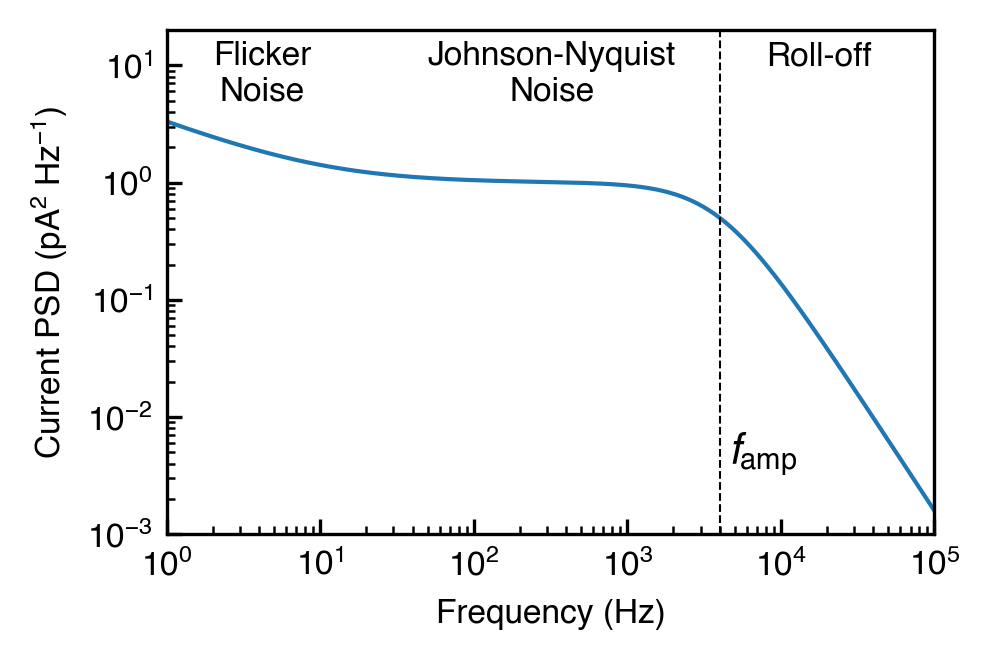

In [3]:
f = np.logspace(0, 5, num=501)
famp = 4000
flicker = 10/f
white = 1
G_rc = lambda x,n: 1/np.sqrt(np.power((1+x**2),n))
plt.figure(figsize=(3.4, 2.3), dpi=300)
plt.plot(f, np.sqrt((flicker+white)*G_rc(f/famp, 2)**2), lw=1) # PSD
plt.axvline(famp, color='k', ls='dashed', lw=0.5)
plt.text(4.5e3, 4e-3, '$f_\mathrm{amp}$')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 1e5)
plt.ylim(1e-3, 20)
plt.ylabel(r'Current PSD (pA$^{2}$ Hz$^{-1}$)', size=8)
plt.xlabel('Frequency (Hz)', size=8)
plt.text(2, 5, 'Flicker\nNoise', color='k', size=8, multialignment='center')
plt.text(50, 5, 'Johnson-Nyquist\nNoise', color='k', size=8, multialignment='center')
plt.text(8e3, 10, 'Roll-off', color='k', size=8)
plt.tight_layout()
# plt.savefig('figs/preamp_spec_illustrate.eps')

From DC up to a few hundred Hz (the actual corner frequency depends on the current) is dominated by flicker noise. The origin of flicker noise has been attributed to mobility fluctuations or charge trapping in electronic devices [24,25]. The middle frequency range is typically relatively flat and dominated by Johnson-Nyquist noise up to the bandwidth of the preamplifier. A preamplifier has a second or higher order low-pass filter (LPF) with a cutoff frequency $f_\mathrm{amp}$, so noise at frequencies above
$f_\mathrm{amp}$ is heavily suppressed. The LPF acts on the signal as well, so the signal is also suppressed above $f_\mathrm{amp}$. From Fig. 1 we can see that the noise spectral density is lower in the middle frequency range, while the signal is not yet attenuated by the cutoff frequency famp. Generally it is more advantageous to use the homodyne method than the DC method to optimize SNR when flicker noise dominates in the low frequency range [26–28]. Hereafter we will focus on SNR in the homodyne method for spectroscopic measurement.

### Tunneling spectroscopy with a lock-in amplifier 

Homodyne detection is commonly carried out by a lock-in amplifier. A lock-in amplifier performs a multiplication of its input (amplified tunneling current) with the reference signal (bias modulation), and it applies a filter to demodulate the product at the chosen frequency. As shown in the circuit diagram in Fig. 2(a), a spectroscopic measurement is performed by applying a DC voltage bias $V_\mathrm{dc}$ and AC voltage modulation $V_\mathrm{dc}$ to the tunnel junction at frequency $f_0$. 


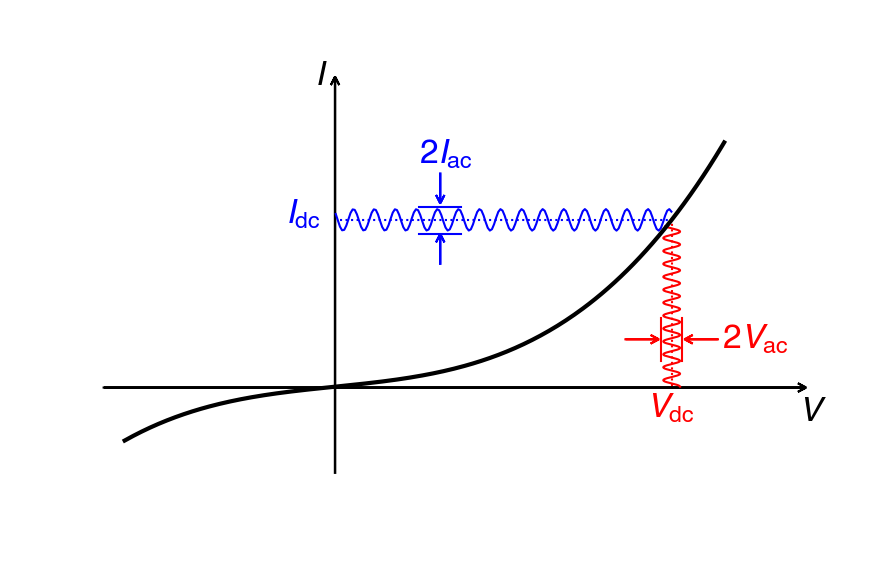

In [4]:
v_ill = np.linspace(-0.5, 1, 300)
i_ill = np.linspace(0, 4.5, 300)
i_cur = 6*v_ill**3 + 1*v_ill
iac_ill = 0.25*np.cos(v_ill*2*np.pi/0.05+np.pi/4) + 3.872
vac_ill = 0.02*np.cos(i_ill*2*np.pi/0.3) + 0.8

plt.figure(figsize=(3, 2), dpi=300)
plt.plot(v_ill[100:-40], iac_ill[100:-40], 'b', lw=0.5)
plt.plot(vac_ill[:248], i_ill[:248], 'r', lw=0.5)
plt.axvline(0.8, ymin=0.24, ymax=0.6, color='r', ls=':', lw=0.5)
plt.axhline(3.872, xmin=0.34, xmax=0.78, color='b', ls=':', lw=0.5)
plt.xlim(-0.6, 1.2)
plt.ylim(-2.5, 8)
plt.gca().set_axis_off()
plt.arrow(-0.55, -0.02, 1.65, 0, width=0.001, color="k", clip_on=False, head_width=0.2, head_length=0.02, lw=0.5, overhang=0.9)
plt.arrow(0, -2, 0, 9, width=0.001, color="k", clip_on=False, head_width=0.02, head_length=0.2, lw=0.5, overhang=0.9)
plt.text(1.1, -0.8, '$V$', fontsize=8)
plt.text(-0.05, 7, '$I$', fontsize=8)
plt.plot(v_ill[:-15], i_cur[:-15], 'k', lw=1)
plt.text(-0.12, 3.8, '$I_\mathrm{dc}$',fontsize=8, color='b')
plt.text(0.74, -0.7, '$V_\mathrm{dc}$',fontsize=8, color='r')
plt.plot((0.2, 0.3), (3.55, 3.55), 'b', lw=0.5)
plt.plot((0.2, 0.3), (4.18, 4.18), 'b', lw=0.5)
plt.arrow(0.25, 2.85, 0, 0.5, width=0.001, color='b', clip_on=False, head_width=0.02, head_length=0.2, lw=0.5, overhang=0.9)
plt.arrow(0.25, 4.95, 0, -0.5, width=0.001, color='b', clip_on=False, head_width=0.02, head_length=0.2, lw=0.5, overhang=0.9)
plt.text(0.2, 5.2, '$2I_\mathrm{ac}$', fontsize=8, color='b')
plt.plot((0.775, 0.775), (0.6, 1.6), 'r', lw=0.5)
plt.plot((0.825, 0.825), (0.6, 1.6), 'r', lw=0.5)
plt.arrow(0.69, 1.1, 0.06, 0, width=0.001, color='r', clip_on=False, head_width=0.2, head_length=0.02, lw=0.5, overhang=0.9)
plt.arrow(0.91, 1.1, -0.06, 0, width=0.001, color='r', clip_on=False, head_width=0.2, head_length=0.02, lw=0.5, overhang=0.9)
plt.text(0.92, 0.9, '$2V_\mathrm{ac}$', fontsize=8, color='r')
plt.tight_layout()
# plt.savefig('figs/acillustr.eps')

For a tunnel junction with a current-to-voltage relation $I(V)$, at small enough $V_\mathrm{ac}$, a Taylor expansion gives the resulting current,
\begin{equation}
I(t) = I(V_\mathrm{dc}) + g(V_\mathrm{dc})V_\mathrm{ac} \cos(2\pi f_{0}t) + i_\mathrm{j}(t) + i_\mathrm{n}(t),
\end{equation}
where the last two terms are additive noise due to the current fluctuations in
the tunnel junction $i_\mathrm{j}(t)$ and the noise floor of the current preamplifier $i_\mathrm{n}(t)$. In Eq. 4 the first two terms
$I(V_\mathrm{dc})$ and $g(V_\mathrm{dc})$ are defined at the average tip-to-sample
distance $z_{0}$, but in fact the tunneling current is proportional to
$e^{-\kappa z(t)}$, where $\kappa^{-1}$ is the current decay length.
If we write $z(t)=z_0 - z_\mathrm{n}(t)$, where $z_\mathrm{n}(t)$ is the disturbance
in the tip-sample distance, then we can approximate Eq. 4 to first order, assuming $\kappa z_\mathrm{n} \ll 1$ and neglecting second order and higher terms.
\begin{eqnarray}
I(t) &&= [I(V_\mathrm{dc}) + g(V_\mathrm{dc})V_\mathrm{ac} \cos(2\pi f_{0}t) + i_\mathrm{j}(t)]\times e^{\kappa z_\mathrm{n}(t)} + i_\mathrm{n}(t)\nonumber\\
&&\approx [I(V_\mathrm{dc}) + g(V_\mathrm{dc})V_\mathrm{ac} \cos(2\pi f_{0}t)]\times[1 + \kappa z_\mathrm{n}(t)] + i_\mathrm{j}(t) + i_\mathrm{n}(t).
\end{eqnarray}
For simplicity, we can rewrite it as
\begin{equation}
I(t) = [I_\mathrm{dc}  + I_\mathrm{ac} \cos(2\pi f_0 t)]\times [1+\zeta(t)] + i_\mathrm{j}(t) + i_\mathrm{n}(t),
\end{equation}

where \begin{equation}\end{equation}
\begin{equation}\tag{7a}
I_\mathrm{dc}  = I(V_\mathrm{dc}),
\label{eq:idc.simp}
\end{equation}
\begin{equation}\tag{7b}
I_\mathrm{ac} = g(V_\mathrm{dc})V_\mathrm{ac},
\label{eq:iac.simp}
\end{equation}
\begin{equation}\tag{7c}
\zeta(t) = \kappa z_\mathrm{n}(t).
\label{eq:zeta.def}
\end{equation}
Note that $\zeta(t)$ is a dimensionless function that quantifies the
modulation of the instantaneous tunneling current by fluctuations in the
tip-sample distance $z(t)$. For example if the current at $z=z_0$ is
equal to $I_0$ then $I(t)=I_0[1+\zeta(t)]$.

At the input of a lock-in amplifier, the DC component in Eq. 6 can be removed by a high-pass filter (which usually has a cut-off frequency less than 1 Hz), and the remaining AC signal is demodulated by multiplying by $\cos(2\pi f_0t)$ [29]. The resulting demodulated output is composed of the “noise-free” signal Iac and the noise current $i(t)$:
\begin{eqnarray}
&& [I(t)-I_\mathrm{dc}]\cos(2\pi f_0 t)\nonumber \\
&& =I_\mathrm{ac} [1+\zeta(t)]\cos^2(2\pi f_0 t) + [I_\mathrm{dc} \zeta(t)+i_\mathrm{j}(t)+i_\mathrm{n}(t)]\cos(2\pi f_0 t)\nonumber\\
&& =\tfrac{1}{2}\big\{I_\mathrm{ac} + I_\mathrm{ac}\zeta(t) + 2[I_\mathrm{dc}\zeta(t)+i_\mathrm{j}(t)+i_\mathrm{n}(t)]\cos(2\pi f_0 t) + I_\mathrm{ac}[1+\zeta(t)]\cos(4\pi f_0 t)\big\}.
\end{eqnarray}
Therefore,
\begin{equation}
i(t) = I_\mathrm{ac} \zeta(t) + 2[I_\mathrm{dc} \zeta(t)+i_\mathrm{j}(t)+i_\mathrm{n}(t)]\cos(2\pi f_0 t) + I_\mathrm{ac} [1+\zeta(t)]\cos(4\pi f_0 t).
\end{equation}
We then transform Eq. 9 to the frequency domain to analyze noise contributions. The Fourier transform of a product of two functions is equal to the convolution of their Fourier transforms. The Fourier transform of the cosine function is a pair of Dirac $\delta$-functions, so their convolution with other functions is especially simple.
\begin{eqnarray}
i(f) &&= I_\mathrm{ac} \zeta(f)+2\big[I_\mathrm{dc} \zeta(f)+i_\mathrm{j}(f)
+i_\mathrm{n}(f)\big]*\tfrac{1}{2}\big[\delta(f-f_0)+\delta(f+f_0)\big]\nonumber\\ 
&&\quad+ I_\mathrm{ac} [1+\zeta(f)] * \tfrac{1}{2}\big[\delta(f-2f_0)+\delta(f+2f_0)\big]\nonumber\\
&&= I_\mathrm{ac} \zeta(f)+I_\mathrm{dc}\big[\zeta(f-f_0)+\zeta(f+f_0)\big]\nonumber\\
&&\quad+\big[i_\mathrm{n}(f-f_0)+i_\mathrm{n}(f+f_0)\big] + \big[i_\mathrm{j}(f-f_0)+i_\mathrm{j}(f+f_0)\big]\nonumber\\
&&\quad+ \tfrac{1}{2}I_\mathrm{ac}\big[\zeta(f-2f_0)+\zeta(f+2f_0)\big] + \tfrac{1 }{2}I_\mathrm{ac}\big[\delta(f-2f_0)+\delta(f+2f_0)\big].
\end{eqnarray}

The noise PSD is given by
\begin{equation}
S_{ii}(f) = i(f)i^*(f),
\end{equation}
where $i^∗(f)$ denotes the complex conjugate of $i(f)$. The noise PSD contains:
1. auto-correlation terms such as $\zeta(f)\zeta^∗(f)$ and $\zeta(f −2f_0)\zeta^∗(f −2f_0)$,
2. cross-correlation terms between two different functions, such as $\zeta(f−f_0)i^∗_n( f − f_0)$,
3. cross-correlation terms between the same function with different frequency shifts, such as
$\zeta(f − f_0)\zeta^∗(f −2f_0)$.
The cross-correlation between two different random functions, when averaged across multiple realizations, is zero if their respective processes are uncorrelated. The terms $i_n$ and $i_j$ are completely uncorrelated to each other and to $\zeta$, so their cross-correlation terms can be dropped. Similarly, the correlation between two frequency-shifted versions of in or $i_j$ is zero. However, it is not clear if terms such as $\zeta( f − f_0)\zeta^∗( f − 2 f_0)$ can be dropped, because in principle there may be a phase relation between different spectral components of $\zeta$ that leads to a nonzero cross-correlation. In what follows we assume that all cross-correlation terms are negligible, for the situation that the STM and the cryostat both have high mechanical quality factors at low temperature.

Defining\begin{equation}\end{equation}
\begin{equation}\tag{12a}
S_{\zeta\zeta}(f)=\zeta(f)\zeta^*(f),    
\end{equation}
\begin{equation}\tag{12b}
S_\mathrm{nn}(f)=i_\mathrm{n}(f) i_\mathrm{n}^*(f),    
\end{equation}
\begin{equation}\tag{12c}
S_\mathrm{jj}(f)=i_\mathrm{j}(f) i_\mathrm{j}^*(f),    
\end{equation}
we can write the total PSD as the sum of all PSDs of the individual terms of $i(f)$
\begin{eqnarray}
S_{ii}(f) &&= I_\mathrm{ac} ^2 S_{\zeta\zeta}(f)+I_\mathrm{dc} ^2 \big[S_{\zeta\zeta}(f-f_0)+S_{\zeta\zeta}(f+f_0)\big]\nonumber\\
&&\quad+\big[S_\mathrm{nn}(f-f_0)+S_\mathrm{nn}(f+f_0)\big] + \big[S_\mathrm{jj}(f-f_0)+S_\mathrm{jj}(f+f_0)\big]\nonumber\\
&&\quad+\tfrac{1}{4}I_\mathrm{ac} ^2\big[S_{\zeta\zeta}(f-2f_0)+S_{\zeta\zeta}(f+2f_0)\big] + {\tfrac{1}{4}I_\mathrm{ac} ^2\big[\delta(f-2f_0)+\delta(f+2f_0)\big]}.
\end{eqnarray}
To make this notation more compact, we define the modulated noise PSDs\begin{equation}\end{equation}
\begin{equation}\tag{14a}
S_{\zeta\zeta,f_0}=\tfrac{1}{2}[S_{\zeta\zeta}(f-f_0)+S_{\zeta\zeta}(f+f_0)],    
\end{equation}
\begin{equation}\tag{14b}
S_{\mathrm{nn},f_0}=\tfrac{1}{2}[S_\mathrm{nn}(f-f_0)+S_\mathrm{nn}(f+f_0)],    
\end{equation}
\begin{equation}\tag{14c}
S_{\mathrm{jj},f_0}=\tfrac{1}{2}[S_\mathrm{jj}(f-f_0)+S_\mathrm{jj}(f+f_0)],    
\end{equation}
\begin{equation}\tag{14d}
S_{\delta\delta,2f_0}=\tfrac{1}{2}[\delta(f-2f_0)+\delta(f+2f_0)],
\end{equation}
so that the total noise current PSD becomes
\begin{equation}
S_{ii} = I_\mathrm{ac} ^2 S_{\zeta\zeta,0}+2I_\mathrm{dc} ^2 S_{\zeta\zeta,f_0}+2S_{nn,f_0} + 2S_{jj,f_0} + \tfrac{1}{2}I_\mathrm{ac} ^2 S_{\zeta\zeta,2f_0} + \tfrac{1}{2}I_\mathrm{ac} ^2 S_{\delta\delta,2f_0},
\end{equation}
which can be compared with the signal power $I^2_\mathrm{ac}$.

During a spectroscopic measurement, $I_\mathrm{ac}$ may not be constant but is typically bounded, whereas
$I_\mathrm{dc}$ is assumed to be a monotonic function of $V_\mathrm{dc}$ and typically reaches values that are much larger than $I_\mathrm{ac}$. It is interesting therefore to note the dependence of the different noise contributions on the ratio $I_\mathrm{dc}/I_\mathrm{ac}$
\begin{equation}
S_{ii}/I_\mathrm{ac} ^2 = S_{\zeta\zeta,0}+\frac{S_{\zeta\zeta,2f_0}}{2}+\frac{S_{\delta\delta,2f_0}}{2} + \frac{2S_{nn,f_0}}{I_\mathrm{ac}^2}+\frac{4k_\mathrm{B}T}{RI_\mathrm{ac} ^2}+\frac{2q_\mathrm{e}}{I_\mathrm{ac}}\left(\frac{I_\mathrm{dc}}{I_\mathrm{ac} }\right)+2S_{\zeta\zeta,f_0}\left(\frac{I_\mathrm{dc} }{I_\mathrm{ac} }\right)^2.
\end{equation} 
where we have approximated the junction noise as the sum of Johonson-Nyquist noise and shot noise components (we will discuss them in details in [Sec. IV B]). As is apparent, there are terms independent of Idc/Iac, one term linear in $I_\mathrm{dc}/I_\mathrm{ac}$, and one term quadratic in $I_\mathrm{dc}/I_\mathrm{ac}$ that gradually dominates the noise spectrum as the bias voltage is increased.

Before calculating noise power, we must take the LPF into account in lock-in measurement. The noise current PSD Sii is filtered at the output of the lock-in amplifier with a transfer function $H ( f )$ of LPF
\begin{equation}
P_{\mathrm{noise}}=\displaystyle\int_{-\infty}^{\infty}{[H(f)i(f)][H(f)i(f)]^*\mathrm{d}f}=\displaystyle\int_{-\infty}^{\infty}{S_{ii}(f)\lvert H(f)\rvert^2\mathrm{d} f}%=2\int_{0}^{\infty}{S_{ii}(f)\lvert H(f)\rvert^2\mathrm{d}  f}
\end{equation} 
We define four dimensionless specific noise power integrals\begin{equation}\end{equation}
\begin{equation}\tag{18a}
p_{\zeta\zeta,0} = \int_{-\infty}^{\infty}{S_{\zeta\zeta,0}\lvert H(f)\rvert^2 \mathrm{d}  f},
\label{eq:pzz.0}
\end{equation}
\begin{equation}\tag{18b}
p_{\zeta\zeta,f_0} = \int_{-\infty}^{\infty}{S_{\zeta\zeta,f_0}\lvert H(f)\rvert^2 \mathrm{d}  f},
\label{eq:pzz.f0}
\end{equation}
\begin{equation}\tag{18c}
p_{\zeta\zeta,2f_0} = \int_{-\infty}^{\infty}{S_{\zeta\zeta,2f_0}\lvert H(f)\rvert^2 \mathrm{d}  f},
\label{eq:pzz.2f0}
\end{equation}
\begin{equation}\tag{18d}
p_{\delta\delta,2f_0} = \int_{-\infty}^{\infty}{S_{\delta\delta,2f_0}\lvert H(f)\rvert^2 \mathrm{d}  f} = \lvert H(2f_0)\rvert^2,
\label{eq:pdd.2f0}
\end{equation}
and two current noise power integrals\begin{equation}\end{equation}
\begin{equation}\tag{19a}
P_{nn,f_0} = \int_{-\infty}^{\infty}{S_{nn,f_0}\lvert H(f)\rvert^2 \mathrm{d}  f},
\label{eq:pnn.f0}
\end{equation}
\begin{equation}\tag{19b}
P_\mathrm{jj} = \int_{-\infty}^{\infty}{S_\mathrm{jj}\lvert H(f)\rvert^2 \mathrm{d}  f} = 2S_\mathrm{jj}B_\mathrm{N}.
\label{eq:pjj}
\end{equation}
In Eq.19b we use the fact that $S_\mathrm{jj}$ is frequency independent, and $B_\mathrm{N}=\displaystyle\int_{0}^{\infty}{\lvert H(f)\rvert^2 \mathrm{d}  f}$ is
the equivalent noise bandwidth (ENBW) of the LPF assuming a
passband gain of 1. We can finally obtain SNR as
\begin{equation}
\mathrm{SNR}=\frac{I_\mathrm{ac}}{\sqrt{P_\mathrm{{noise}}}}=
\Bigg[p_{\zeta\zeta,0}
+2\left(\frac{I_\mathrm{dc}}{I_\mathrm{ac}}\right)^2 p_{\zeta\zeta,f_0}
+\frac{2P_{nn,f_0}}{I_\mathrm{ac} ^2}
+\frac{2P_\mathrm{jj}}{I_\mathrm{ac} ^2}
+\frac{1}{2}p_{\zeta\zeta,2f_0}
+\frac{1}{2}\lvert H(2f_0)\rvert^2
\Bigg]^{-1/2}.
\end{equation} 
Commonly, SNR is expressed in decibel
\begin{eqnarray}
\mathrm{SNR}[\rm{dB}]&&=20\log_{10}\left(\frac{I_\mathrm{ac}}{\sqrt{P_\mathrm{{noise}}}}\right)\nonumber\\
&&=-10\log_{10}\left[p_{\zeta\zeta,0}
+2\left(\frac{I_\mathrm{dc} ^2}{I_\mathrm{ac} ^2}\right)p_{\zeta\zeta,f_0}
+\frac{2P_{nn,f_0}}{I_\mathrm{ac} ^2}
+\frac{2P_\mathrm{jj}}{I_\mathrm{ac} ^2}
+\frac{1}{2}p_{\zeta\zeta,2f_0}
+\frac{1}{2}\lvert H(2f_0)\rvert^2\right].
\end{eqnarray} 
For example, an SNR of 40 dB means that the RMS noise amplitude is 1% of the signal.

We pause at this point to inspect the different factors that have influences on SNR:
1. The low-pass filter $|H(f)|$ selected by the experimenter. We will discuss the choice of the low-pass filter in the [Sec. II B].
2. $I_\mathrm{dc}$ is determined by the DC bias voltage Vdc and average tip-sample separation $z_0$. Within some constraints, the experimenter can select any $z_0$.
3. $I_\mathrm{ac}$ is determined by the voltage modulation Vac and the junction impedance $dV /dI$
4. $V_\mathrm{ac}$ determines the energy resolution of the measurement when thermal broadening can be
neglected $qeVac ≫ 4kBTj$.[30]
5. $S_\mathrm{nn}$ is determined by the current preamplifier noise and may depend on the junction impedance
dV /dI. We will discuss Snn in [Sec. IV A].
6.  $S_\mathrm{jj}$ is composed of junction Johnson-Nyquist noise proportional to junction temperature and
shot noise proportional to Idc. We will discuss Sjj in [Sec. IV B].
7. $S_\mathrm{\zeta\zeta}$ is determined by environmental vibrations and STM stiffness, by scan voltage noise and
scanner response, and by the electronic properties of the tip and sample which determine κ. We will discuss $S_\mathrm{\zeta\zeta}$ in [Sec. IV C].

SNR may vary by over 10 dB at different $I_\mathrm{dc}$ values in a spectroscopy measurement, as shown in a following example in Fig. 15. In order to optimize the efficiency in a spectroscopy measurement, we can keep the SNR constant the SNR approximately constant by averaging N independent measurements at each voltage point, which increases the SNR by $10\log_{10}N$ dB, or by adjusting $H(f)$ as we will show in [Sec. III A].

To have a clear view of how each term in Eq. 20 contributes to SNR, Fig. 3 illustrates the noise flow towards the output of the lock-in amplifier. The prime feature of the noise flow is that the noise experiences two convolution operations in frequency domain: the first one between dimensionless $\zeta(t)$ and current (both signal and noise) before entering preamplifier input; the second one between output of preamplifier and reference signal in the lock-in amplifier. The consequence of convolution operations exhibits in the terms involving the power of $\zeta$ .

![Fig.3]("fig/flowchart.eps")

### Choice of the low-pass filter 

## Fig. 3 

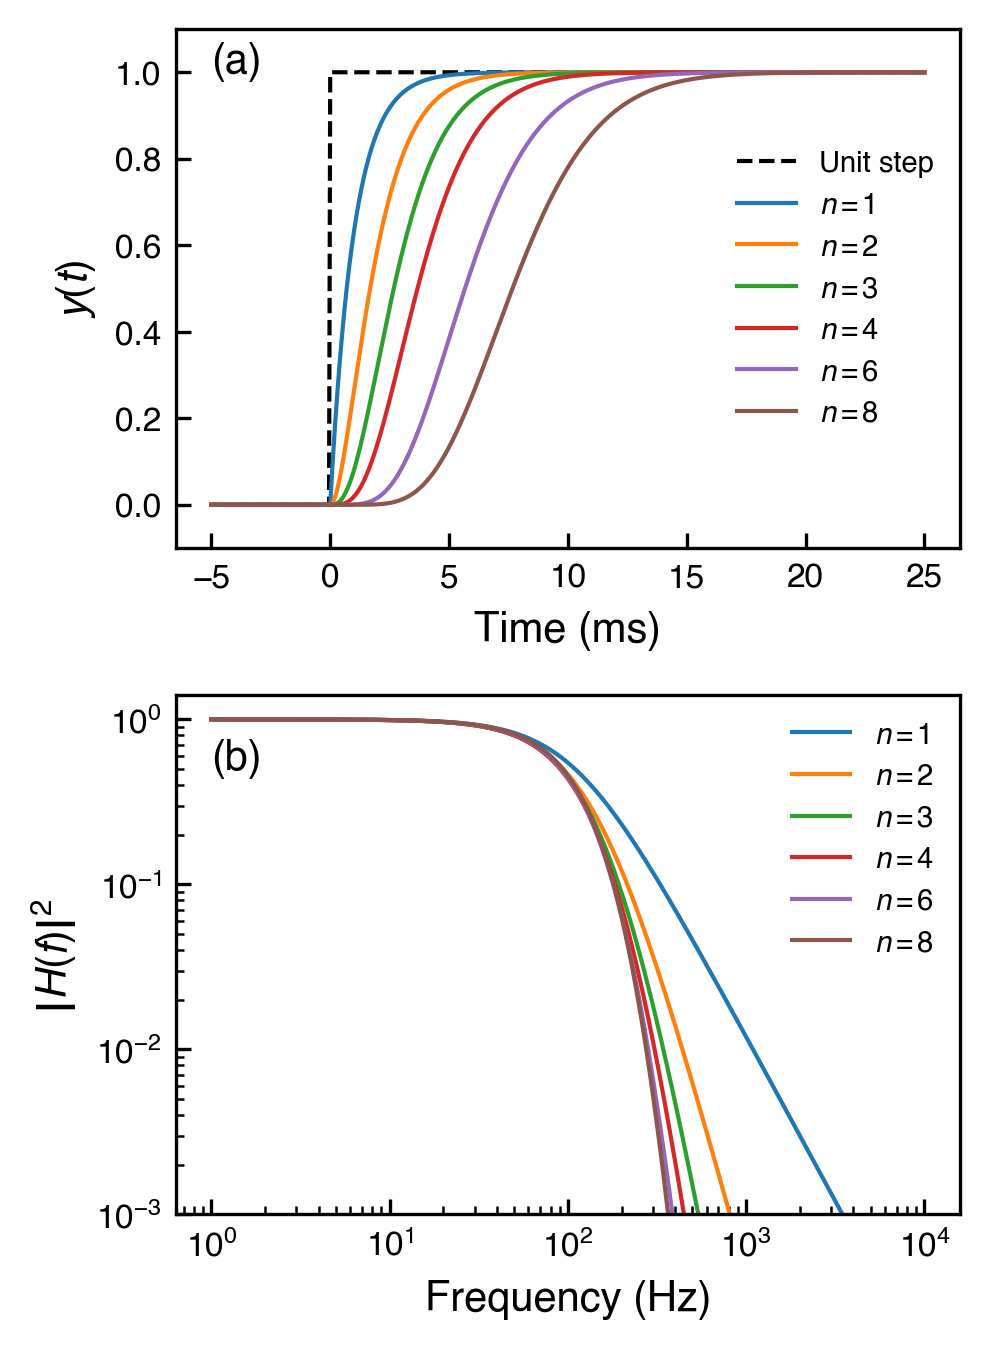

In [192]:
def H2_rc(f, tau, p): return 1./np.power((1+(2*np.pi*f*tau)**2),p)
t = np.linspace(-0.005, 0.025, 601)
u = np.ones_like(t)
u[:100]=0
def h_rc(x, n):
  y = np.zeros_like(x)
  for ix, iy in enumerate(x):
    if iy>0:
      y[ix] = scipy.special.gammainc(n, iy)
  return y
f = np.logspace(0, 4, 401)
Ts = 0.01
tau = 1e-3
fig = plt.figure(figsize=(3.4, 2.3*2),dpi=300)
plt.subplot(211)
plt.plot(t*1000, u, 'k', ls='dashed', lw=1, label='Unit step')
plt.plot(t*1000, h_rc(t/tau,1)*u, lw=1, label='$n=1$')#, Ts=%.1fms'%(1e3*tau*6.9))
plt.plot(t*1000, h_rc(t/tau,2)*u, lw=1, label='$n=2$')#, Ts=%.1fms'%(1e3*tau*9.2))
plt.plot(t*1000, h_rc(t/tau,3)*u, lw=1, label='$n=3$')#, Ts=%.1fms'%(1e3*tau*11.3))
plt.plot(t*1000, h_rc(t/tau,4)*u, lw=1, label='$n=4$')#, Ts=%.1fms'%(1e3*tau*13.1))
plt.plot(t*1000, h_rc(t/tau,6)*u, lw=1, label='$n=6$')#, Ts=%.1fms'%(1e3*tau*16.5))
plt.plot(t*1000, h_rc(t/tau,8)*u, lw=1, label='$n=8$')#, Ts=%.1fms'%(1e3*tau*19.6))
plt.ylim(-0.1,1.1)
# plt.title(r'RC Filters with equal time constant $\tau$=1.5 ms')
plt.ylabel('$y(t)$')
plt.xlabel('Time (ms)')
plt.legend(fontsize=7, frameon=False, loc=5)
plt.text(-5, 1, '(a)', size=10)
plt.subplot(212)
plt.plot(f, H2_rc(f,Ts/6.9,1), lw=1, label='$n=1$')#, fc=%dHz'%(1/2/np.pi/(Ts/6.9)))
plt.plot(f, H2_rc(f,Ts/9.2,2), lw=1, label='$n=2$')#, fc=%dHz'%(1/2/np.pi/(Ts/9.2)))
plt.plot(f, H2_rc(f,Ts/11.3,3), lw=1, label='$n=3$')#, fc=%dHz'%(1/2/np.pi/(Ts/11.3)))
plt.plot(f, H2_rc(f,Ts/13.1,4), lw=1, label='$n=4$')#, fc=%dHz'%(1/2/np.pi/(Ts/13.1)))
plt.plot(f, H2_rc(f,Ts/16.5,6), lw=1, label='$n=6$')#, fc=%dHz'%(1/2/np.pi/(Ts/16.5)))
plt.plot(f, H2_rc(f,Ts/19.6,8), lw=1, label='$n=8$')#, fc=%dHz'%(1/2/np.pi/(Ts/19.6)))
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3,1.4)
# plt.title('RC Filters with equal 99.9% settling time $T_s$=10 ms')
plt.ylabel(r'$\left\| H(f)\right\| ^2$')
plt.xlabel('Frequency (Hz)')
plt.legend(fontsize=7, frameon=False, loc=1)
plt.text(1, 0.5, '(b)', size=10)
plt.tight_layout()
plt.savefig('figs/rcfilter.eps')

## Fig. 4 

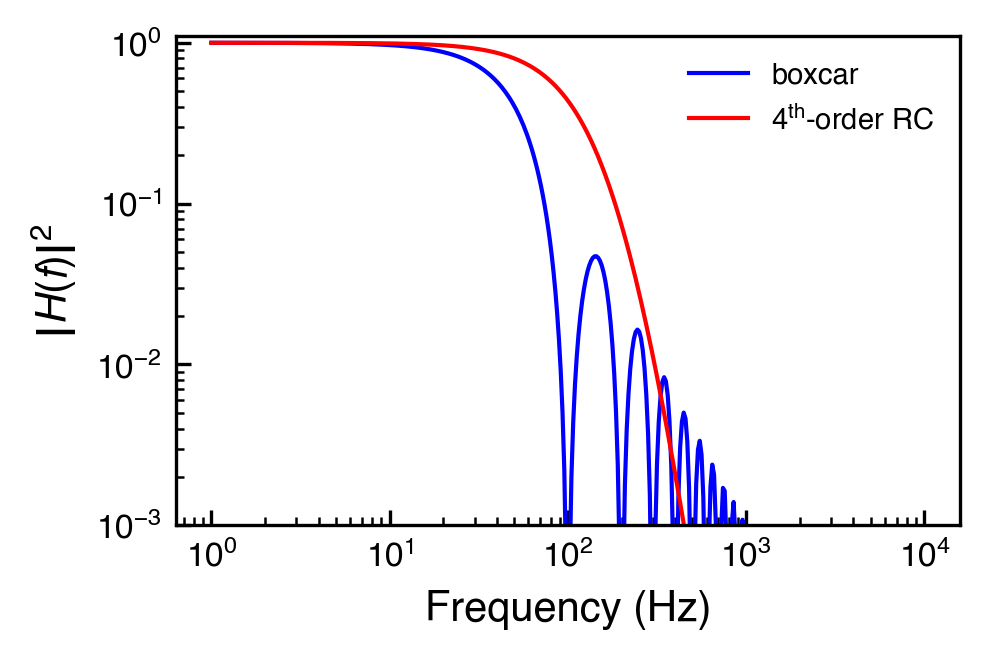

In [76]:
# Settling times (in units of 1/f_c)
#   1-pole RC: 1.1
#   2-pole RC: 1.47
#   3-pole RC: 1.79
#   4-pole RC: 2.08
f0 = 1000
def H2_box(f, tau): return np.abs(np.sinc(f*tau))**2
def H2_rc(f, tau, p): return 1./np.power((1+(2*np.pi*f*tau)**2),p)
ts=0.01

fig = plt.figure(figsize=(3.4, 2.3), dpi=300)
plt.plot(f, H2_box(f, ts), 'b', lw=1, label='boxcar')
plt.plot(f, H2_rc(f, ts/13.1, 4), 'r', lw=1, label='4$^{\mathrm{th}}$-order RC')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3,1.1)
# plt.title('Filters with equal 99.9% settling time $T_s=10ms$')
plt.ylabel(r'$\left\| H(f)\right\| ^2$')
plt.legend(fontsize=7, frameon=False, loc=1)
plt.xlabel('Frequency (Hz)')
plt.tight_layout()
# plt.savefig('figs/Hf2_comparison.eps')

In [218]:
f[np.argmin(np.abs(H2_box(f, ts)-1/np.sqrt(2)))], f[np.argmin(np.abs(H2_rc(f, ts/13.1, 4)-1/np.sqrt(2)))]

(31.98895109691399, 62.373483548241914)

## Fig. 5 

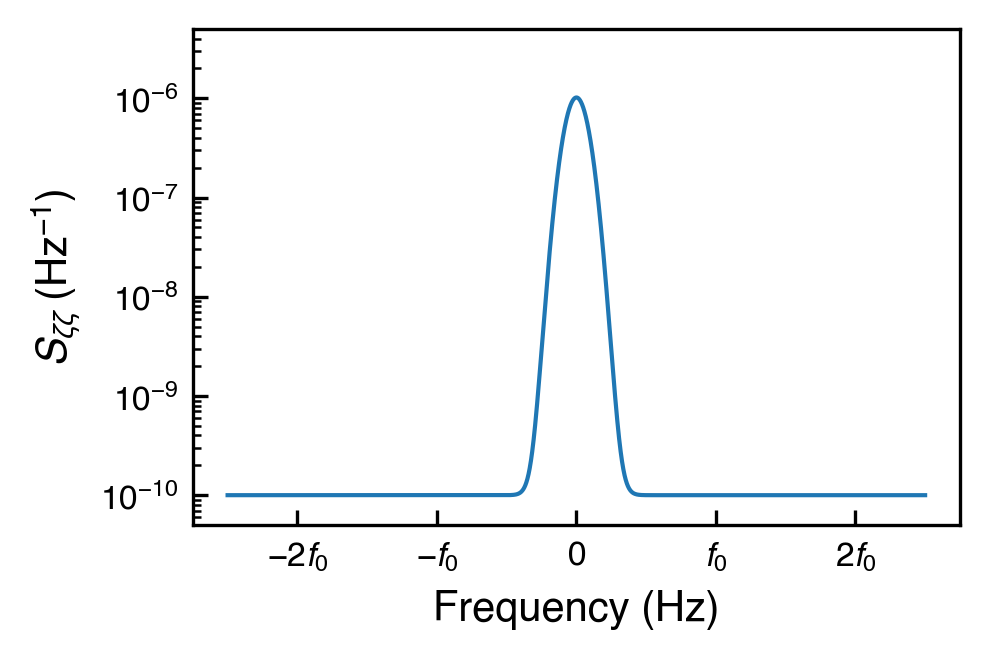

In [79]:
#@title
from numpy import sqrt

f0 = 1000; # modulation frequency, Hz

def gaussian(f,df):
    return np.exp(-np.square(f/df)/2)
def S_zz(f):
    return (1e-5 + 1e-3 * gaussian(f,f0/10))**2

f = np.arange(-2.5*f0,+2.5*f0,1)
plt.figure(figsize=(3.4, 2.3), dpi=300)
plt.semilogy(f,S_zz(f), lw=1); 
plt.xticks([-2*f0,-f0,0,f0,2*f0], ['$-2f_0$','$-f_0$','$0$','$f_0$','$2f_0$'])
plt.ylim(5e-11,5e-6)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Frequency (Hz)') 
plt.ylabel(r'$S_{\zeta\zeta}$ (Hz$^{-1}$)')
plt.tight_layout()
plt.savefig('figs/szz_gauss.eps')

In [225]:
max(S_zz(f))

1.0201000000000002e-06

## Fig. 6 

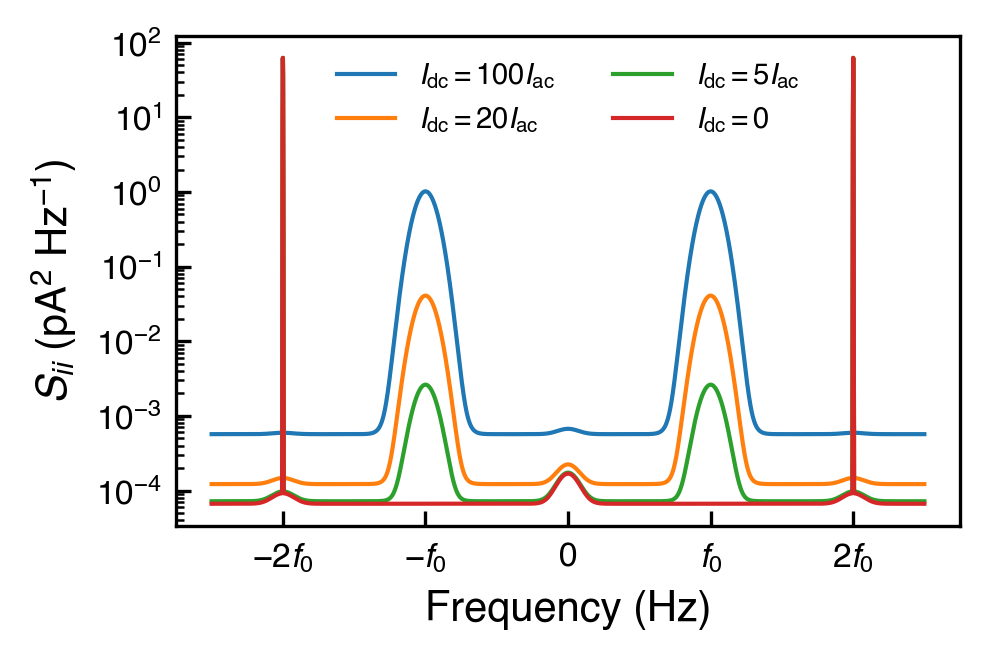

In [175]:
#@title
q_e = 1.6e-19 # C
T = 300 # K
k_B = 1.38e-23 # J/K
R_j = 1e9 # ohms

Iac = 10e-12 # A
f = np.arange(-2.5*f0,+2.5*f0,1)
def delta(f):
    return gaussian(f,1)/np.sqrt(2/np.pi)
def S_nn(f):
    i_n0 = 5e-15 # A/sqrt(Hz)
    return i_n0**2 + f*0 # white noise
def S_jj(Idc):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore") # underflow error is common here, so ignore warning
        gamma = 2/(np.exp((q_e*Idc*R_j)/(k_B*T))-1)
    return q_e*Idc*(1+gamma)
def S_ii(f,f0,Iac,Idc):
    return Iac**2 * S_zz(f) + 2*Idc**2 * (S_zz(f-f0)+S_zz(f+f0))/2\
  + 2*(S_nn(f-f0)+S_nn(f+f0))/2 + 2*S_jj(Idc) + 1/2*Iac**2 * (S_zz(f-2*f0)+S_zz(f+2*f0))/2\
  + 1/2*Iac**2*(delta(f-2*f0) + delta(f+2*f0))

plt.figure(figsize=(3.4, 2.3), dpi=300)
plt.plot(f, 1e24*S_ii(f,f0,Iac,100*Iac), lw=1, label='$I_\mathrm{dc}=100I_\mathrm{ac}$')
plt.plot(f, 1e24*S_ii(f,f0,Iac,20*Iac), lw=1, label='$I_\mathrm{dc}=20I_\mathrm{ac}$')
plt.plot(f, 1e24*S_ii(f,f0,Iac,5*Iac), lw=1, label='$I_\mathrm{dc}=5I_\mathrm{ac}$')
plt.plot(f, 1e24*S_ii(f,f0,Iac,0.001*Iac), lw=1, label='$I_\mathrm{dc}=0$')
plt.xticks([-2*f0,-f0,0,f0,2*f0], ['$-2f_0$','$-f_0$','$0$','$f_0$','$2f_0$'])
plt.yscale('log')
#plt.ylim(0.9e-5,1)
plt.legend(fontsize=7, frameon=False,ncol=2)
plt.ylabel(r'$S_{ii}$ (pA$^{2}$ Hz$^{-1}$)')
plt.xlabel('Frequency (Hz)')
plt.tight_layout()
plt.savefig('figs/sii_vs_idc.eps')

## Fig. 7 

In [8]:
from scipy.integrate import trapz, simps

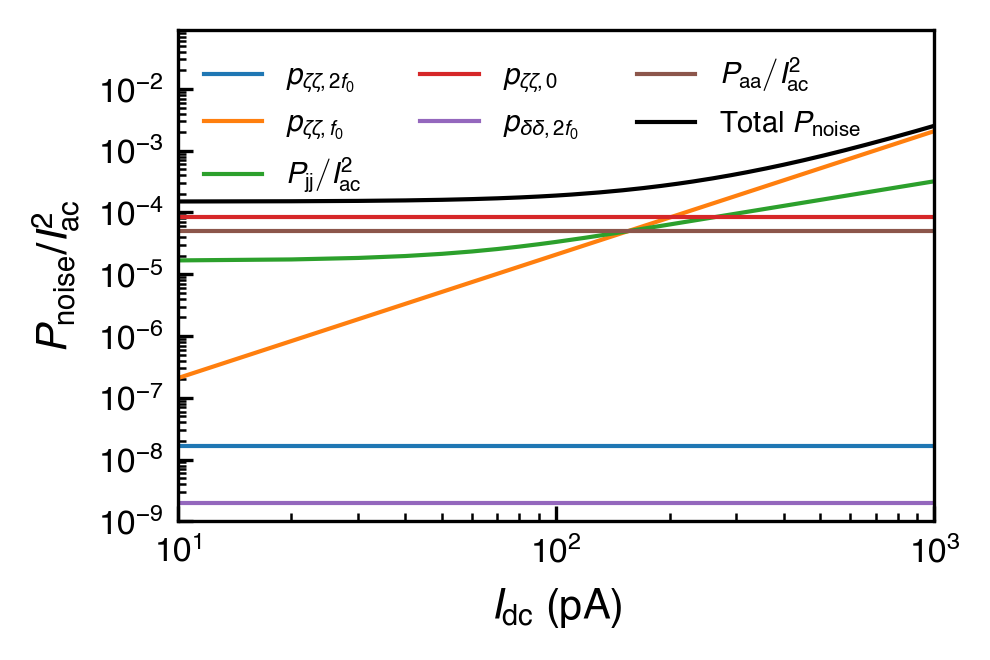

In [176]:
#@title
def S_zz(f):
    return (1e-5+1e-3 * gaussian(f,f0/10))**2

def H2_box(f, tau): return np.abs(np.sinc(f*tau))**2
def H2_rc(f, tau, p): return 1./np.power((1+(2*np.pi*f*tau)**2),p)
ts=0.01
def p_zz(f,f0):
    return simps(H2_box(f, ts) * (S_zz(f-f0)+S_zz(f+f0))/2, x=f)
def p_nn(f,f0):
    return simps(H2_box(f, ts) * (S_nn(f-f0)+S_nn(f+f0))/2, x=f)
def p_jj(f,Idc):
    return simps(H2_box(f, ts), x=f) * S_jj(Idc)

Iac = 10e-12
Idc = np.arange(1,1001,1)*Iac
f = np.arange(-1e5, 1e5, 1)

n_zz = 2*p_zz(f,f0)*(Idc/Iac)**2  # \zeta noise at f0
n_jj = 2*p_jj(f,Idc)/Iac**2       # junction noise
n_nn = 2*p_nn(f,f0)/Iac**2+0*Idc  # preamplifier noise at f0
n_zz0 = p_zz(f,0)+0*Idc         # \zeta noise around f=0
n_zz2f0 = 1/2*p_zz(f,2*f0)+0*Idc    # \zeta noise around 2f0
n_dd2f0 = 1/2*H2_rc(2*f0, ts, 2)+0*Idc  # lockin cos(2f0) component

n = n_zz + n_jj + n_nn + n_zz0 + n_zz2f0 + n_dd2f0  # total noise power

fig=plt.figure(figsize=(3.4, 2.3), dpi=300)
plt.plot(Idc*1e12,n_zz2f0, lw=1, label=r'$p_{\zeta\zeta, 2f_0}$')
plt.plot(Idc*1e12,n_zz, lw=1, label=r'$p_{\zeta\zeta,f_0}$')
plt.plot(Idc*1e12,n_jj, lw=1, label=r'$P_{\mathrm{jj}}\left /I_\mathrm{ac}^2\right.$')
plt.plot(Idc*1e12,n_zz0, lw=1, label=r'$p_{\zeta\zeta,0}$')
plt.plot(Idc*1e12,n_dd2f0, lw=1, label=r'$p_{\delta\delta,2f_0}$')
plt.plot(Idc*1e12,n_nn, lw=1, label=r'$P_{\mathrm{aa}}\left /I_\mathrm{ac}^2\right.$')
plt.plot(Idc*1e12,n,'k', lw=1, label=r'Total $P_\mathrm{noise}$')
plt.legend(fontsize=7, frameon=False,ncol=3, loc=2)
plt.xscale('log')
plt.yscale('log')
plt.xlim(10, 1000)
plt.ylim(1e-9, 0.09)
plt.xlabel('$I_\mathrm{dc}$ (pA)')
plt.ylabel('$P_\mathrm{noise}/I_\mathrm{ac}^2$')
# plt.grid(linestyle='--')
plt.tight_layout()
plt.savefig('figs/pnoise_vs_idc.eps')

## Fig. 8 

  Unfiltered: -6.799dB
  Boxcar:     25.993dB
  4-pole RC:  28.861dB


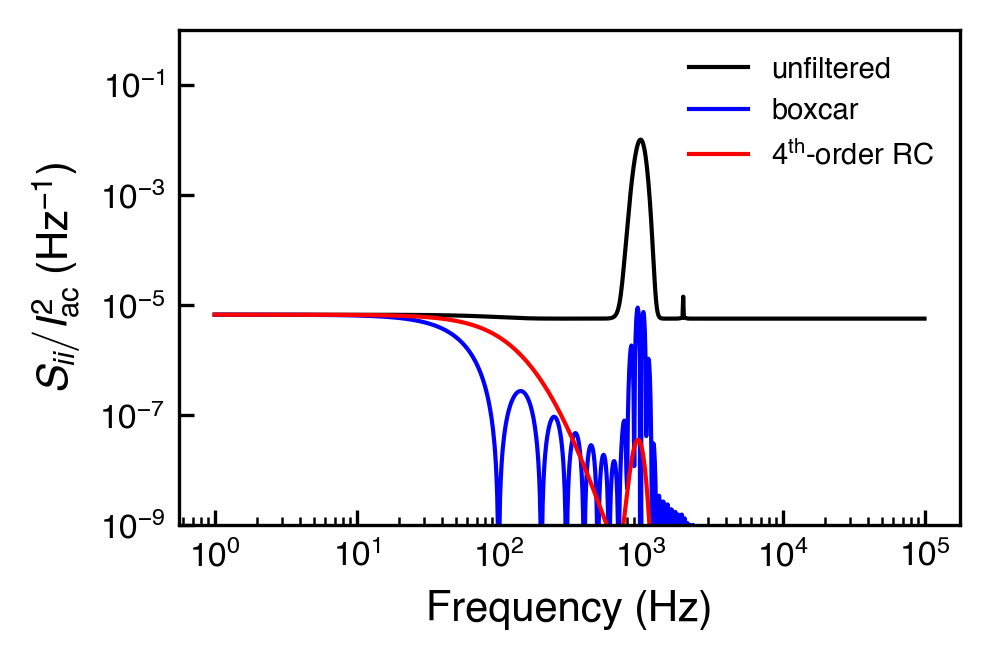

In [179]:
def SNR(f,Sii_,Iac):
    return -10*np.log10(2*scipy.integrate.simps(Sii_, x=f)/Iac**2)
def H2_box(f, tau): return np.abs(np.sinc(f*tau))**2
def H2_rc(f, tau, p): return 1./np.power((1+(2*np.pi*f*tau)**2),p)
f0=1000
ts = 0.01
f = np.logspace(0, 5, 1001)
I_ac = 10e-12;
I_dc = 100*Iac;
Sii_0 = S_ii(f,f0,I_ac,I_dc)
Sii_box = Sii_0*H2_box(f, ts)
Sii_RC = Sii_0*H2_rc(f, ts/13.1,4)

plt.figure(figsize=(3.4, 2.3), dpi=300)
plt.plot(f, Sii_0/I_ac**2, 'k', lw=1, label='unfiltered')
plt.plot(f, Sii_box/I_ac**2, 'b', lw=1, label='boxcar')
plt.plot(f, Sii_RC/I_ac**2, 'r', lw=1, label='4$^{\mathrm{th}}$-order RC')
plt.ylim(1e-9,1)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$S_{ii}\left/I_\mathrm{ac}^2\right.$ (Hz$^{-1}$)')
# plt.title('Lockin output PSD, $f_0$={}Hz, ${}={}$, ${}={}$'.format(f0,'I_{ac}',I_ac,'I_{dc}',I_dc))
plt.legend(fontsize=7, frameon=False)
plt.xlabel('Frequency (Hz)')
plt.tight_layout()
plt.savefig('figs/toy_psd_vs_filters.eps')
print('  Unfiltered: {:.3f}dB'.format(SNR(f,Sii_0,I_ac)));
print('  Boxcar:     {:.3f}dB'.format(SNR(f,Sii_box,I_ac)));
print('  4-pole RC:  {:.3f}dB'.format(SNR(f,Sii_RC,I_ac)));


## Fig. 9 

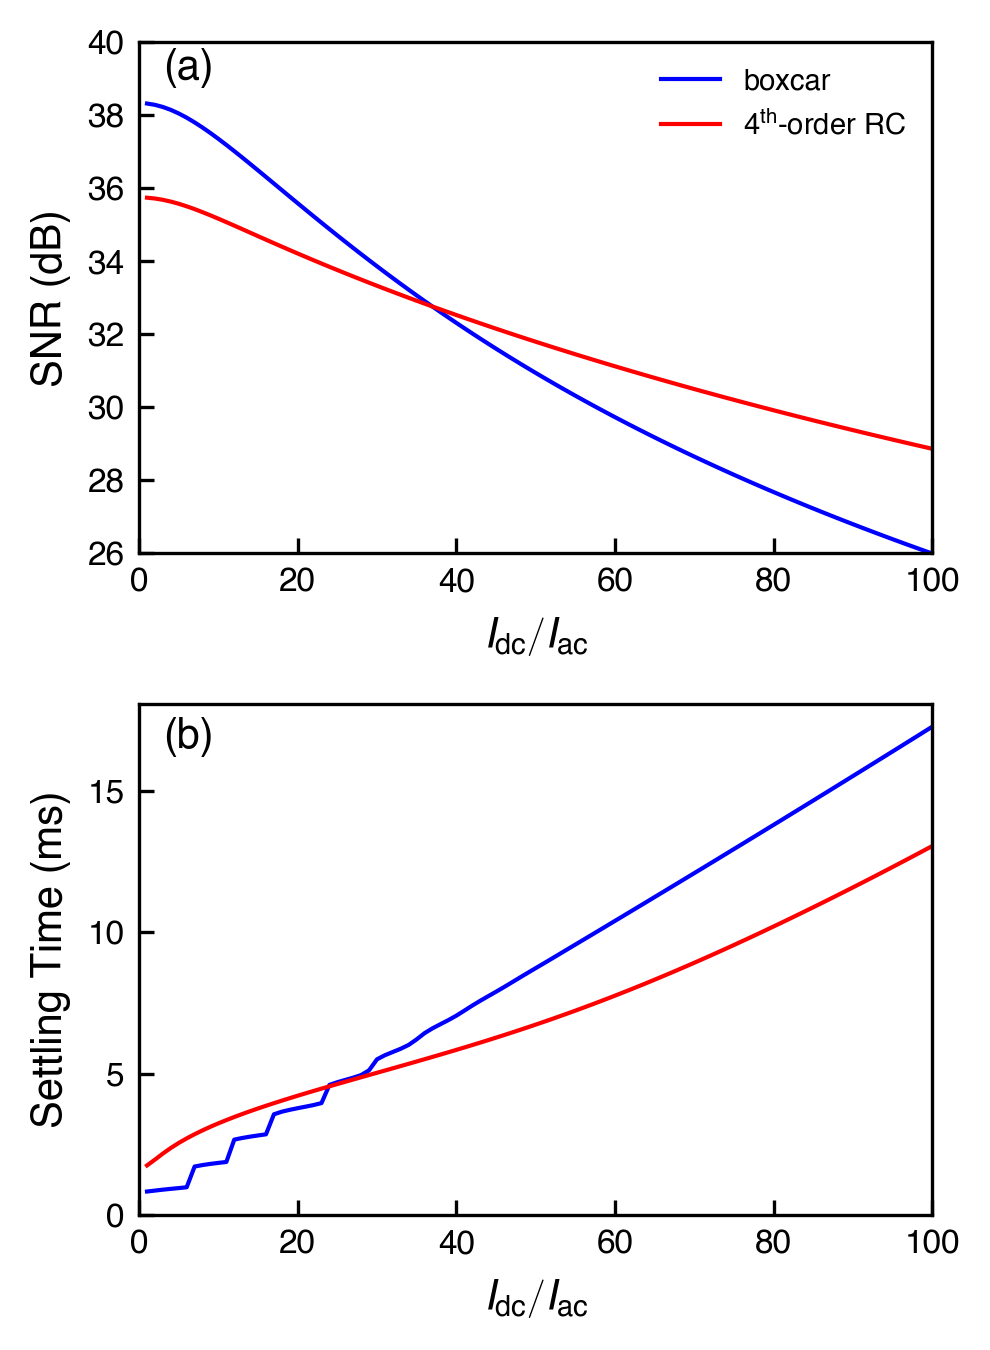

In [202]:
I_ac = 10e-12
f0=1000
ts = 0.01
def H2_box(f, tau): return np.abs(np.sinc(f*tau))**2
def H2_rc(f, tau, p): return 1./np.power((1+(2*np.pi*f*tau)**2),p)

snr_0 = 30
def getts_box(ts):
    return SNR(f, Sii_0*H2_box(f, ts), I_ac)-snr_0
def getts_rc(ts):
    return SNR(f, Sii_0*H2_rc(f, ts/13.1, 4), I_ac)-snr_0

rms_0 = []
rms_box = []
rms_gauss = []
rms_rc = []
ts_box = []
ts_rc = []
# f = np.linspace(1, 1e5, 100000)
f = np.logspace(0, 5, 1001)
I_dc_range = I_ac * np.arange(1,101,1)
for I_dc in I_dc_range:
    Sii_0 = S_ii(f,f0,I_ac,I_dc)
    rms_0.append(SNR(f,Sii_0,I_ac))
    rms_box.append(SNR(f,Sii_0 * H2_box(f, ts),I_ac))
    rms_rc.append(SNR(f,Sii_0 * H2_rc(f, ts/13.1 ,4),I_ac))
    ts_box.append(opt.bisect(getts_box, 1/(2*np.pi*f0), 1/(2*np.pi*(f[1]-f[0])),  maxiter=1000)*1000)
    ts_rc.append(opt.bisect(getts_rc, 1/(2*np.pi*f0), 1/(2*np.pi*(f[1]-f[0])),  maxiter=1000)*1000)

plt.figure(figsize=(3.4, 4.6), dpi=300)
plt.subplot(211)
plt.plot(I_dc_range/I_ac,rms_box, 'b', lw=1, label='boxcar')
plt.plot(I_dc_range/I_ac,rms_rc, 'r', lw=1, label='4$^\mathrm{th}$-order RC')
plt.xscale('linear') 
plt.yscale('linear') #dB
plt.xlim(0, 100)
plt.ylim(26, 40)
plt.xlabel(r'$I_\mathrm{dc}\left/I_\mathrm{ac}\right.$')
plt.ylabel('SNR (dB)')
# plt.title('$f_0={}kHz$, $T_S={}ms$'.format(f0/1000,1000/fc))
plt.legend(fontsize=7, frameon=False)
plt.text(3, 39, '(a)', size=10)
plt.subplot(212)
plt.plot(I_dc_range/I_ac, ts_box, 'b', lw=1, label='boxcar')
plt.plot(I_dc_range/I_ac, ts_rc, 'r', lw=1, label='4$^\mathrm{th}$-order RC')
plt.xlim(0, 100)
plt.xlabel(r'$I_\mathrm{dc}\left/I_\mathrm{ac}\right.$')
plt.ylabel('Settling Time (ms)')
# plt.title('$f_0={}kHz$, $T_S={}ms$'.format(f0/1000,1000/fc))
# plt.legend(fontsize=7, frameon=False, loc)
plt.text(3, 16.5, '(b)', size=10)
plt.tight_layout()
plt.savefig('figs/toy_snr_vs_idciac.eps')

## Fig. 10 

In [203]:
# Load data:
# Sample data files are saved in csv format, with time in seconds and current in amps
# stored in the first and second columns, respectively.

# !git clone https://github.com/Let0n/achievinglownoiseinsts 
preampDataFile = 'Richard-4K-Preamp.csv'
noiseDataFile = 'Richard-4K-OutOfFeedback.csv'
noiseData = np.loadtxt(noiseDataFile, delimiter=",")
preampData = np.loadtxt(preampDataFile, delimiter=",")

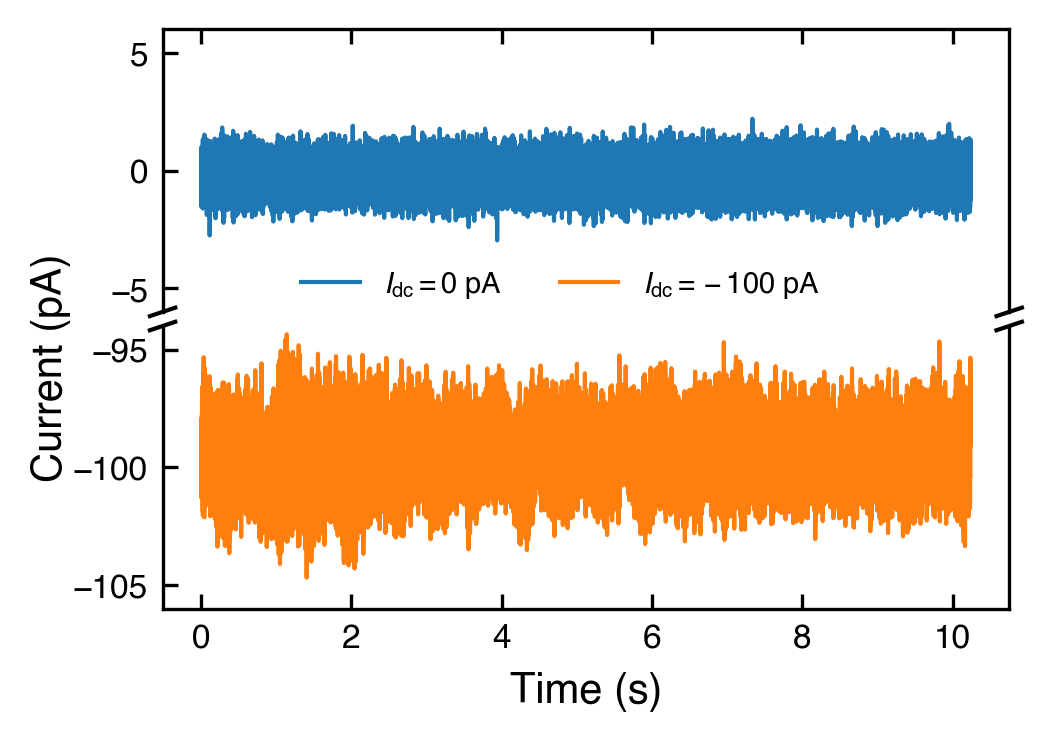

In [142]:
# Outline of the simulator program:
# 1. Load Iamplifier(t) data taken with tip out of tunneling
# 2. Load I(t) data taken with tip in tunneling but feedback loop open,
# and normalize by the mean current to get z(t)+Ithermal(t)+Ishot(t)+Iamplifier(t) 
#     [Idc should be as large as possible to get an accurate measure of z(t)]
# 3. Need to know the differential conductance of the junction at Idc bias to estimate Ithermal
# 4. Apply a Weiner filter with the estimated noise Iamplifier+Ithermal+Ishot, 
# to recover a higher accuracy version of z(t) for time-domain analysis if needed
# 5. Calculate the PSD of z and Iamplifier. Calculate Ishot and Ithermal for 
# the Idc of the z(t) measurement and subtract Iamplifier, Ishot and Ithermal from z
# 6. Assuming coherence between separate z(t) frequency components is zero, 
# calculate the normalized noise spectrum at the lockin demodulator output
# as a function of Idc, Iac, and f0 (modulation frequency). 
# 7. For any desired settling time (and accuracy) we can select various low pass 
# filters and show how they will influence the signal to noise ratio
# Filters: RC (1,2,3,4-pole), N-period boxcar, gaussian or a combination of the above.

# adjust all data to account for preamp offset
preampOffset = np.mean(preampData[:,1])
Idc = np.mean(noiseData[:,1]) - preampOffset # dc current
noiseData_ac = np.copy(noiseData) 
preampData_ac = np.copy(preampData)
preampData_ac[:,1] = preampData[:,1] - preampOffset
noiseData_ac[:,1] = noiseData[:,1] - preampOffset - Idc
Vdc = -0.1;   # dc bias voltage 

def loadPSD2fromTimeDomain(data, df):
  Ns = data.shape[0];                            # number of samples
  Fs = (Ns-1)/(data[-1,0]-data[0,0])             # sample rate
  f, psd = sig.welch(data[:,1],Fs,'hanning',Fs/df,return_onesided=0)
  return (f,psd)

df = 5 # frequency bin width

f2, preampPSD2 = loadPSD2fromTimeDomain(preampData_ac, df)
f2_, noisePSD2 = loadPSD2fromTimeDomain(noiseData_ac, df)

if len(f2) != len(f2_):
    raise ImportError('Preamp and noise data are not the same sample rate')

f2 = np.fft.fftshift(f2)
n0 = int(len(f2)/2)  # zero frequency bin
n1 = n0+1           # first positive frequency bin, will be used for fitting

f1 = f2[n0:]
preampPSD2 = np.fft.fftshift(preampPSD2)
noisePSD2 = np.fft.fftshift(noisePSD2)

k = 1.38e-23
T = 4 #Kelvin
q = 1.6e-19 #coulomb

shotNoise = abs(1.6e-19*Idc);
thermalNoise = abs(2*k*T*(Idc/Vdc)); # Johnson-Nyquist noise current
# This assumes differential conductance is equal to Idc/Vdc [linear I(V)]. 
#In practice this should be measured by lock-in on the sample at the same bias
junctionNoise = q * Idc / np.tanh(q*Vdc/2/k/T)

# print('DC current: {:.2e} A'.format(Idc))
# print('Shot noise: {:.2e} A^2/Hz'.format(shotNoise))
# print('Junction thermal noise: {:.2e} A^2/Hz'.format(thermalNoise))
# print(' ==> Junction noise: {:.2e} A^2/Hz'.format(junctionNoise))

fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(3.4, 2.3), dpi=300)
ax.plot(preampData[:,0],preampData[:,1]*1e12, lw=1, label='$I_\mathrm{dc} = 0$ pA')
ax.plot(noiseData[:,0],noiseData[:,1]*1e12, lw=1, label='$I_\mathrm{dc} = -100$ pA')
ax2.plot(preampData[:,0],preampData[:,1]*1e12, lw=1, label='$I_\mathrm{dc} = 0$ pA')
ax2.plot(noiseData[:,0],noiseData[:,1]*1e12, lw=1, label='$I_\mathrm{dc} = -100$ pA')
ax.set_ylim(-6, 6)  # outliers only
ax2.set_ylim(-106, -94)  # most of the data
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False, lw=1)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
fig.text(0.02, 0.5, 'Current (pA)', va='center', rotation='vertical', size=10); ax2.set_xlabel('Time (s)')
ax.legend(fontsize=7, frameon=False, loc=(0.15, 0.0), ncol=2)
plt.subplots_adjust(left=0.15, top=0.99, bottom=0.15, right=0.98, hspace=0.05)
# plt.tight_layout()
plt.savefig('figs/current_traces.eps')

## Fig. 11 

Fitting parameters:  [1.03260311e-30 1.14605510e+02 1.50145216e+03]


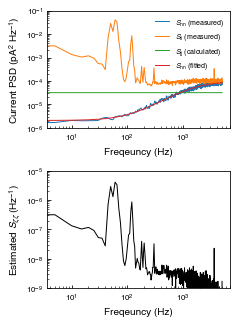

In [39]:
epsilon = 1e-100 # used to avoid log(0)

# logarithmic scale fitting for preamp noise spectrum
def preamp_noise_model(logf, a, b, c):
    return np.log(epsilon + a * (1 + np.power(np.abs(np.exp(logf)/b),1.5))/(1+np.power(np.abs(np.exp(logf)/c),1.5)))

guess = np.array([1e-30,150,2000]);
       


# fit positive frequencies to preamp noise model
popt, pcurv = opt.curve_fit(preamp_noise_model,np.log(f2[n1:]),np.log(preampPSD2[n1:]),guess)
print('Fitting parameters: ',popt)

preampPSD2_fit = np.exp(preamp_noise_model(np.log(abs(f2)+epsilon), *popt));
junctionNoisePSD2 = np.zeros_like(f2)+junctionNoise
junctionNoisePSD2[0]=0
junctionNoisePSD2 = np.fft.fftshift(junctionNoisePSD2)
def get_1sidedPSD(_2sidedPSD):
  _1sidedPSD = _2sidedPSD[n0:]*2; _1sidedPSD[0] = _2sidedPSD[0]
  return _1sidedPSD
preampPSD = get_1sidedPSD(preampPSD2)
preampPSD_fit = get_1sidedPSD(preampPSD2_fit)
junctionNoisePSD = get_1sidedPSD(junctionNoisePSD2)
noisePSD = get_1sidedPSD(noisePSD2)

#calculate Szz
zPSD2 = (noisePSD2 - preampPSD2 - junctionNoisePSD2) / Idc**2
zPSD = get_1sidedPSD(zPSD2)

plt.figure(figsize=(3.4, 4.6), dpi=300)
plt.subplot(211)
plt.plot(f1,preampPSD*1e24, lw=1, label='$S_\mathrm{nn}$ (measured)')
plt.plot(f1,noisePSD*1e24, lw=1, label='$S_\mathrm{ii}$ (measured)')
plt.plot(f1,junctionNoisePSD*1e24, lw=1, label='$S_\mathrm{jj}$ (calculated)')
plt.plot(f1,preampPSD_fit*1e24, lw=1, label='$S_\mathrm{nn}$ (fitted)')
plt.legend(fontsize=7, frameon=False)
plt.ylabel('Current PSD (pA$^2$ Hz$^{-1}$)')
plt.xlabel('Freqeuncy (Hz)')
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-6, 0.1)
plt.subplot(212)
plt.loglog(f1,zPSD,'k', lw=1)
#plt.title('')
plt.ylabel('Estimated $S_{\zeta\zeta}$ (Hz$^{-1}$)')
plt.ylim(1e-9,1e-5)
plt.xlabel('Freqeuncy (Hz)')
plt.tight_layout()
# plt.savefig('figs/current_psd_est_szz.eps')

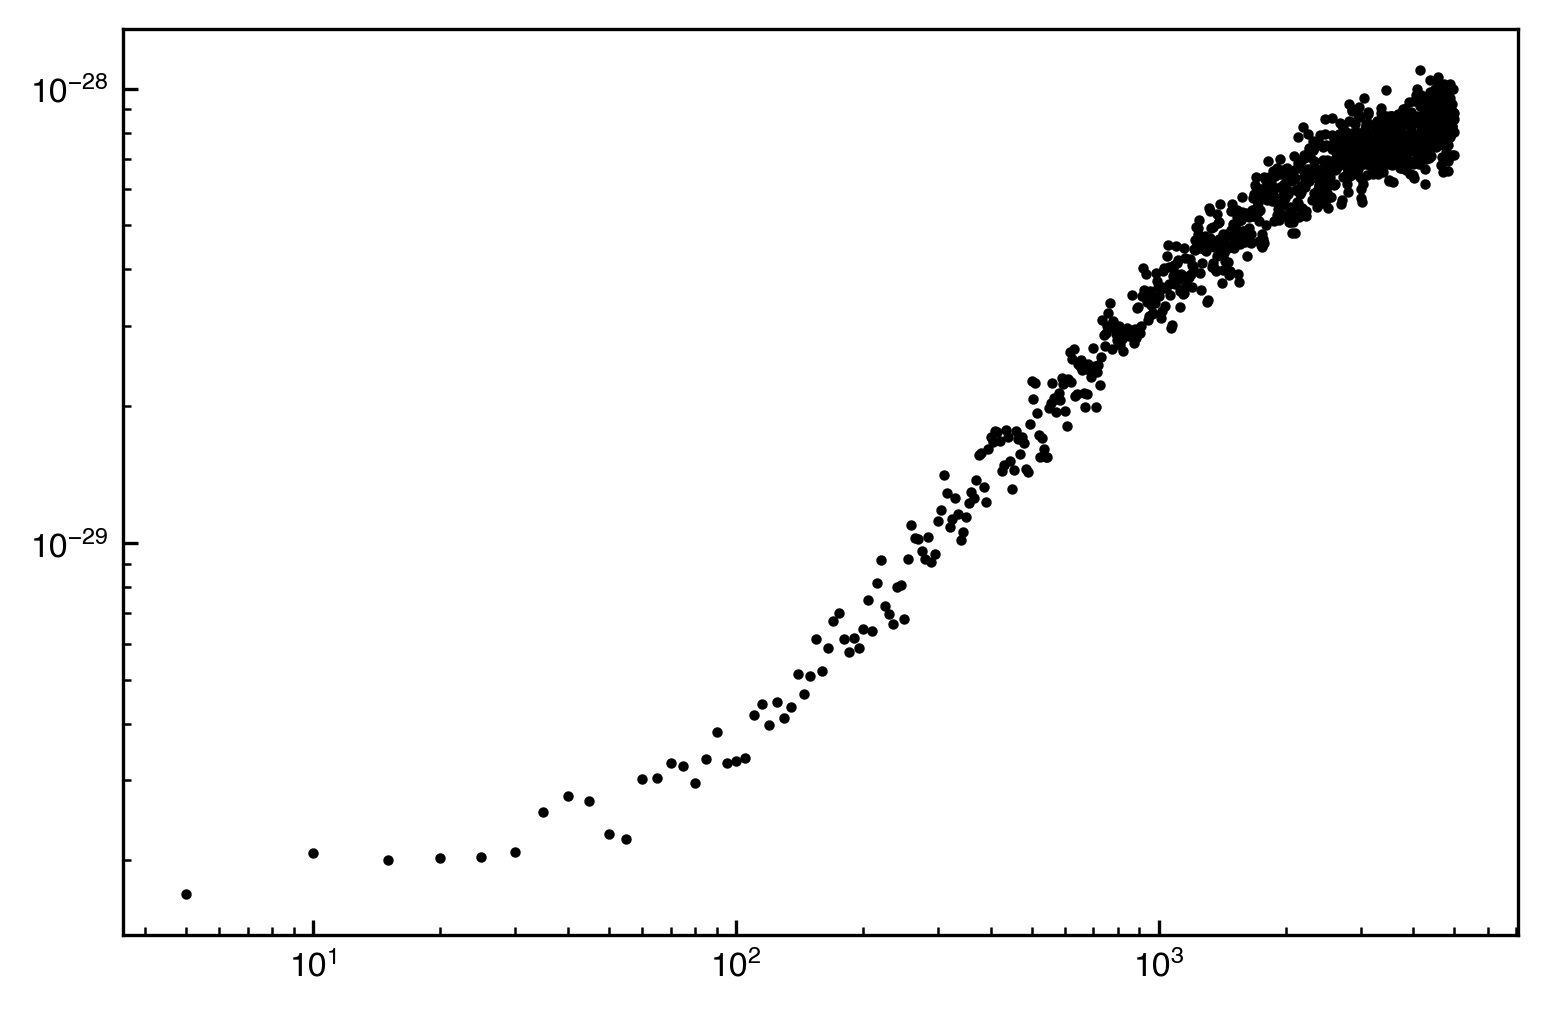

In [230]:
def tia(f, rf, i_n, e_n, fc, fp):
    return 4 * 1.38e-23 * 300 / rf + i_n**2 / np.absolute(1+(f/fc)**2) + (e_n/rf)**2 * np.absolute((1+(f/fp)**2)/(1+(f/fc)**2))
# p, p_err = opt.curve_fit(tia, f2[n1:], preampPSD2[n1:], p0=[1.0e10, 1e-15, 4e-9, 150, 2000])
# print('Rf=%.2e Ohm, i_n=%.2e A/sqrt(Hz), e_n=%.2e V/sqrt(Hz), fc=%d Hz, fp=%d Hz'%(p[0], p[1], p[2], p[3], p[4]))

# plt.plot(f1, 4*1.38e-23*300/1e10+0*f1, 'g', lw=1)
# plt.plot(f1, 0.8e-15**2 / np.absolute(1+(f1/1000)**2), 'm', lw=1)
# plt.plot(f1, (2e-9/1e10)**2 * np.absolute((1+(f1/.08)**2)/(1+(f1/1000)**2)), 'b', lw=1)
# plt.plot(f1, tia(f1, 1e10, 0.5e-15, 2e-9, 4000, 0.08), 'r', lw=1)
# plt.plot(f2[n1:], tia(f2[n1:], p[0], p[1], p[2], p[3], p[4]), 'r', lw=1)
plt.plot(f1, preampPSD, 'k.', ms=3)
plt.xscale('log')
plt.yscale('log')

## Fig. 12

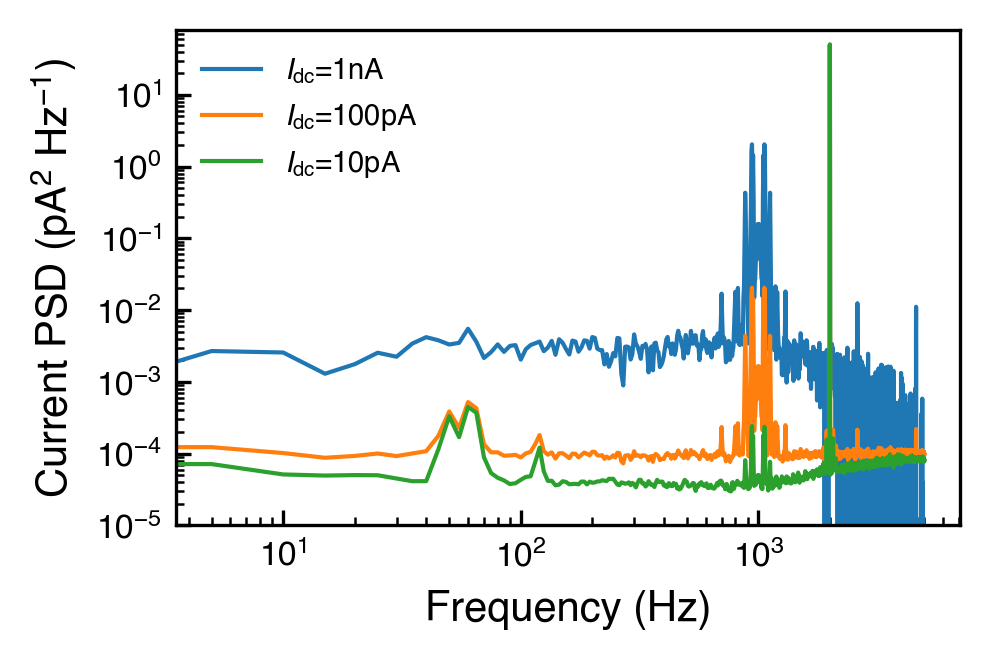

In [58]:

f0 = 1000
fc = 100
Iac = 1e-11
Vdc = 0.1
Idc = 0
T = 4

demodPSD2 = []
demodPSD = []

def calculate_demodPSD():
  global demodPSD2; global demodPSD; global Iac; global Idc; global T; global Vdc; global f0;
  
  n_f0 = int(round(f0/df)) # f0 in frequency bins
  n_pad = 2*n_f0 # number of bins for zero padding

  zPSD2_pad = np.pad(zPSD2,(n_pad,n_pad),'constant',constant_values=(np.mean(zPSD2[0:20])))
  preampPSD2_pad = np.pad(preampPSD2,(n_pad,n_pad),'constant',constant_values=(np.mean(preampPSD2[0:20])))

  newJunctionNoise = q * Idc / np.tanh(q*Vdc/2/k/T)
  junctionNoisePSD2_pad = np.zeros_like(preampPSD2_pad)+newJunctionNoise
  junctionNoisePSD2_pad[0]=0
  junctionNoisePSD2_pad = np.fft.fftshift(junctionNoisePSD2_pad)

  demodPSD2_pad = np.copy(zPSD2_pad)*Iac**2
  demodPSD2_pad += np.roll(zPSD2_pad, n_f0)*Idc**2/2
  demodPSD2_pad += np.roll(zPSD2_pad, -n_f0)*Idc**2/2
  demodPSD2_pad += np.roll(zPSD2_pad, 2*n_f0)*Iac**2/4
  demodPSD2_pad += np.roll(zPSD2_pad, -2*n_f0)*Iac**2/4
  demodPSD2_pad[n0 + n_pad + 2*n_f0] += Iac**2/4
  demodPSD2_pad[n0 + n_pad - 2*n_f0] += Iac**2/4
  demodPSD2_pad += np.roll(preampPSD2_pad, n_f0)/2 #preamp noise
  demodPSD2_pad += np.roll(preampPSD2_pad, -n_f0)/2 #preamp noise
  demodPSD2_pad += junctionNoisePSD2_pad #junction noise

  demodPSD2 = demodPSD2_pad[n_pad:-n_pad] # remove padding
  demodPSD = get_1sidedPSD(demodPSD2) # convert to 1-sided PSD

  
plt.figure(figsize=(3.4, 2.3), dpi=300)
Idc = 1e-9; calculate_demodPSD(); plt.plot(f1,demodPSD*1e24,lw=1, label='$I_\mathrm{dc}$=1nA')
Idc = 1e-10; calculate_demodPSD(); plt.plot(f1,demodPSD*1e24, lw=1, label='$I_\mathrm{dc}$=100pA')
Idc = 1e-11; calculate_demodPSD(); plt.plot(f1,demodPSD*1e24, lw=1, label='$I_\mathrm{dc}$=10pA')
plt.legend(fontsize=7, frameon=False)
plt.ylabel('Current PSD (pA$^2$ Hz$^{-1}$)')
plt.xlabel('Frequency (Hz)')
# plt.title('I$_{ac}$=10pA')
plt.ylim(1e-5,8e1)
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()
plt.savefig('figs/demod_psd_vs_idc.eps')

## Fig. 13

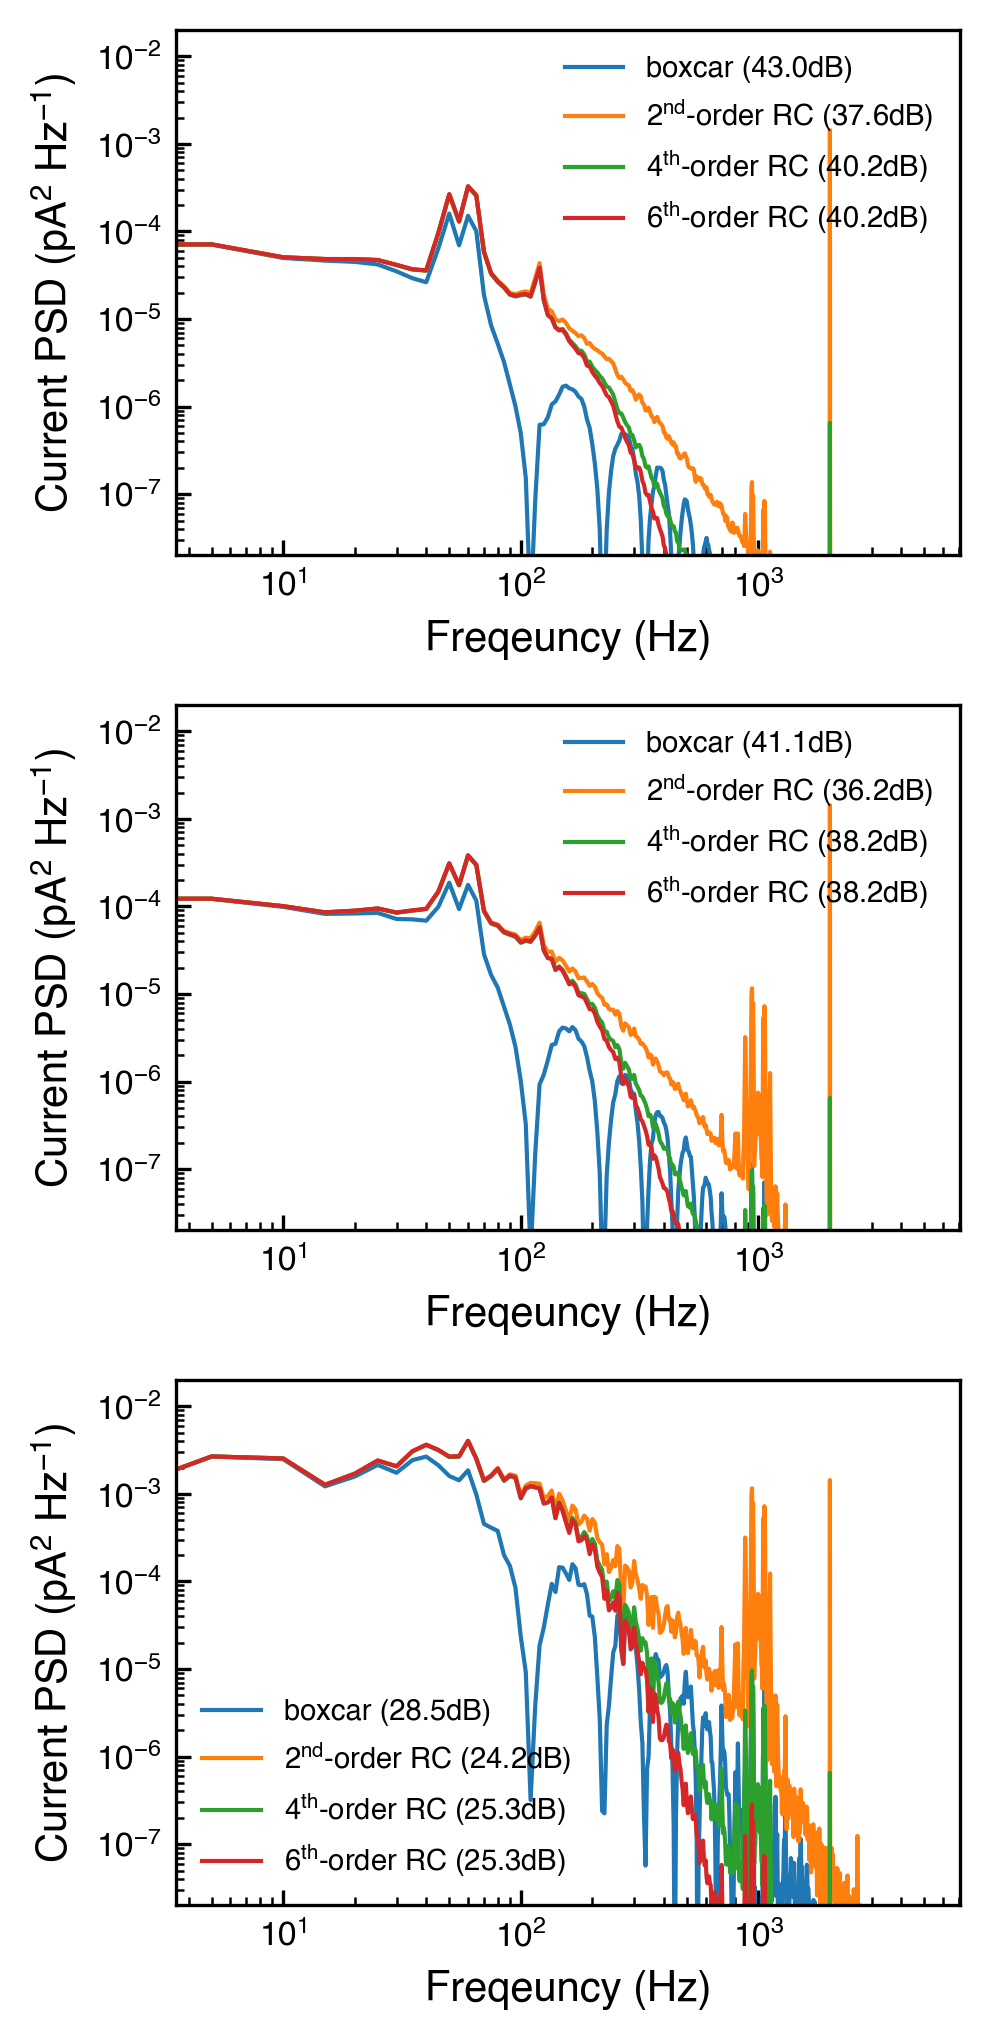

In [59]:
fc = 100
G_box = lambda x: np.abs(np.sinc(x))
G_rc = lambda x,n: 1/np.sqrt(np.power((1+x**2),n))
outPSD_sinc=[]
outPSD_sinc2=[]
outPSD_RC2=[]
outPSD_RC4=[]
outPSD_RC6=[]

outPSD_sinc2_fc=0
outPSD_rc2_fc=0
outPSD_rc4_fc=0
outPSD_rc6_fc=0

def calculate_outPSD():
  global outPSD_sinc; global outPSD_sinc2; global outPSD_RC4; global outPSD_RC2; global outPSD_RC6
  global outPSD_sinc2_fc; global outPSD_rc2_fc; global outPSD_rc4_fc; global outPSD_rc6_fc
  
  outPSD_sinc2_fc = 1/(1/fc-1/(1*f0)) # 1/f0 time to be used by the pre-filter, this is the remainder to reach the required settling time
  outPSD_rc2_fc = fc*9.23/2/np.pi # settling time to 99.9% final value is equal to the required settling time
  outPSD_rc4_fc = fc*13.06/2/np.pi
  outPSD_rc6_fc = fc*16.45/2/np.pi
  
  outPSD_sinc = demodPSD*np.square(G_box(f1/fc))
  outPSD_sinc2 = demodPSD*np.square(G_box(f1/(1*f0)))*np.square(G_box(f1/outPSD_sinc2_fc))
  outPSD_RC2 = demodPSD*np.square(G_rc(f1/outPSD_rc2_fc,2))
  outPSD_RC4 = demodPSD*np.square(G_rc(f1/outPSD_rc4_fc,4))
  outPSD_RC6 = demodPSD*np.square(G_rc(f1/outPSD_rc6_fc,6))
  
def plot_outPSD_compare():
  plt.loglog(f1,1e24*outPSD_sinc2, lw=1, label='boxcar (%.1fdB)'%(-10*np.log10(np.sum(outPSD_sinc2)*df/Iac**2)))
  plt.loglog(f1,1e24*outPSD_RC2, lw=1, label=r'2$^\mathrm{nd}$-order RC (%.1fdB)'%(-10*np.log10(np.sum(outPSD_RC2)*df/Iac**2)))
  plt.loglog(f1,1e24*outPSD_RC4, lw=1, label=r'4$^\mathrm{th}$-order RC (%.1fdB)'%(-10*np.log10(np.sum(outPSD_RC4)*df/Iac**2)))
  plt.loglog(f1,1e24*outPSD_RC6, lw=1, label=r'6$^\mathrm{th}$-order RC (%.1fdB)'%(-10*np.log10(np.sum(outPSD_RC6)*df/Iac**2)))
  plt.ylim(2e-8,2e-2)
  plt.legend(fontsize=7, frameon=False)
#   plt.title(r'$I_{{dc}}={:.1e}A, I_{{ac}}={:.1e}A, f_0={}kHz, T_s={:.1f}ms$'.format(Idc,Iac,f0/1000,1000/fc))
  plt.xlabel('Freqeuncy (Hz)')
  plt.ylabel('Current PSD (pA$^2$ Hz$^{-1}$)')
#   print('SNR:')
#   print('  double boxcar filter ({:.2f}ms + {:.2f}ms): {:.1f}dB'.format(1000/f0,1000/outPSD_sinc2_fc,-10*np.log10(np.sum(outPSD_sinc2)*df/Iac**2)))
#   print('  2-pole RC filter ({:.1f}Hz): {:.1f}dB'.format(outPSD_rc2_fc,-10*np.log10(np.sum(outPSD_RC2)*df/Iac**2)))
#   print('  4-pole RC filter ({:.1f}Hz): {:.1f}dB'.format(outPSD_rc4_fc,-10*np.log10(np.sum(outPSD_RC4)*df/Iac**2)))
#   print('  6-pole RC filter ({:.1f}Hz): {:.1f}dB'.format(outPSD_rc6_fc,-10*np.log10(np.sum(outPSD_RC6)*df/Iac**2)))

plt.figure(figsize=(3.4, 6.9),dpi=300)
plt.subplot(311)
Idc = 1e-11
calculate_demodPSD()
calculate_outPSD()
plot_outPSD_compare()
plt.subplot(312)
Idc = 1e-10; 
calculate_demodPSD(); 
calculate_outPSD()
plot_outPSD_compare()
plt.tight_layout()
plt.subplot(313)
Idc = 1e-9; 
calculate_demodPSD(); 
calculate_outPSD()
plot_outPSD_compare()
plt.tight_layout()
plt.savefig('figs/demod_psd_vs_filters_iac.eps')

## Fig. 15 

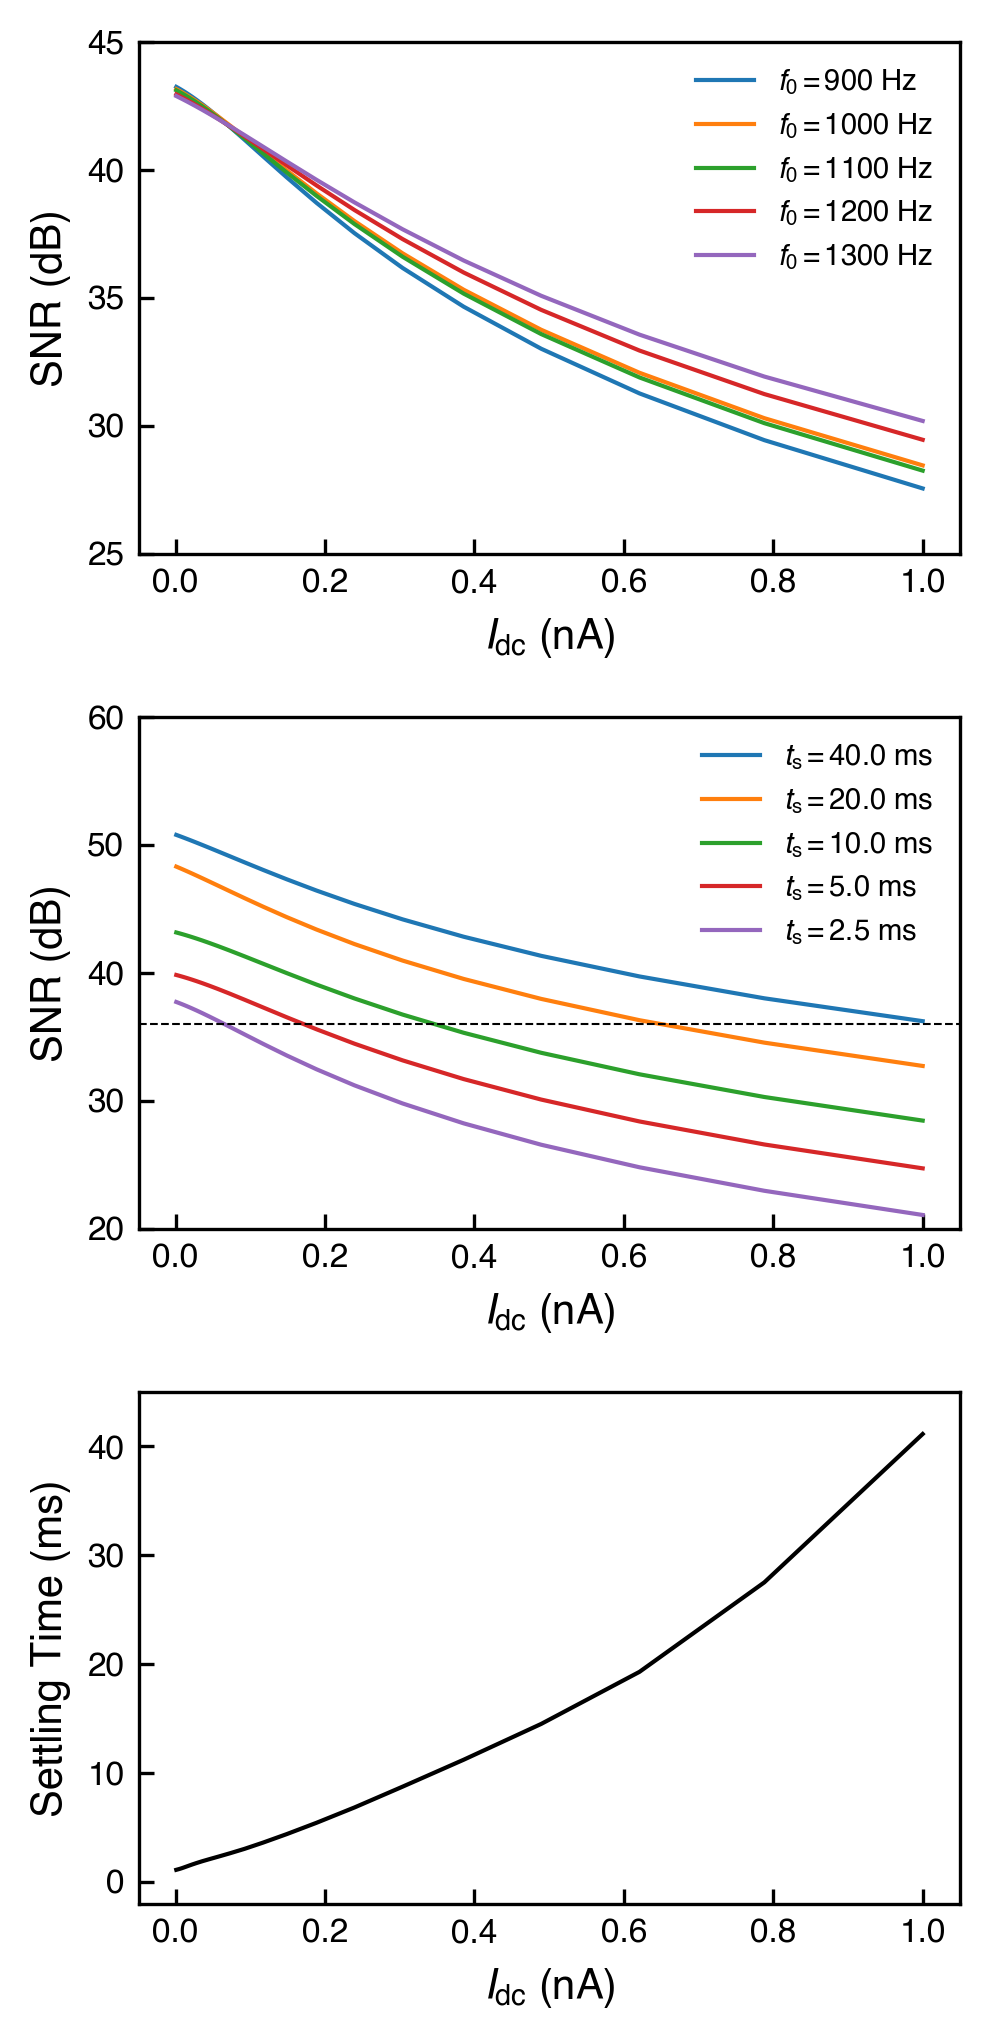

In [73]:
plt.figure(figsize=[3.4, 6.9], dpi=300)
# plt.figure(figsize=[3.4, 4.6])
plt.subplot(311)
fc = 100
Idc_n = np.array(np.logspace(-12, -9, num=30, endpoint=True))
for ix, f0 in enumerate(np.linspace(900,1300,num=5,endpoint=True)):
  SNR_n = np.array([])
  for Idc in Idc_n:
    calculate_demodPSD()
    outPSD_sinc2_fc = 1/(1/fc-1/(1*f0)) # 1/f0 time to be used by the pre-filter, this is the remainder to reach the required settling time
    outPSD_sinc2 = demodPSD*np.square(G_box(f1/(1*f0)))*np.square(G_box(f1/outPSD_sinc2_fc))
    SNR_n=np.append(SNR_n,-10*np.log10(np.sum(outPSD_sinc2)*df/Iac**2))
  plt.plot(Idc_n*1e9,SNR_n, label='$f_0 =${:.0f} Hz'.format(f0), lw=1)
plt.legend(fontsize=7, frameon=False, loc=1)
plt.ylim(25, 45)
plt.xlabel('$I_\mathrm{dc}$ (nA)')
plt.ylabel('SNR (dB)')

plt.subplot(312)
f0=1000
for fc in [25,50,100,200,400]:
  SNR_n = np.array([])
  for Idc in Idc_n:
    calculate_demodPSD()
    outPSD_sinc2_fc = 1/(1/fc-1/f0) # 1/f0 time to be used by the pre-filter, this is the remainder to reach the required settling time
    outPSD_sinc2 = demodPSD*np.square(G_box(1*f1/f0))*np.square(G_box(f1/outPSD_sinc2_fc))
    SNR_n=np.append(SNR_n,-10*np.log10(np.sum(outPSD_sinc2)*df/Iac**2))
  plt.plot(Idc_n*1e9,SNR_n,label=r'$t_\mathrm{s}=$%.1f ms'%(1000/fc), lw=1)
plt.legend(fontsize=7, frameon=False, loc=1)
plt.ylim(20, 60)
plt.xlabel('$I_\mathrm{dc}$ (nA)')
plt.ylabel('SNR (dB)')
plt.axhline(36.02, color='k', lw=0.5, ls='--')
# plt.title('f$_0$=1000Hz')

plt.subplot(313)
snr_0 = 36.02
def getts_real(fc):
    calculate_demodPSD()
    outPSD_sinc2_fc = 1/(1/fc-1/f0) # 1/f0 time to be used by the pre-filter, this is the remainder to reach the required settling time
    outPSD_sinc2 = demodPSD[1:]*np.square(G_box(f1[1:]/(1*f0)))*np.square(G_box(f1[1:]/outPSD_sinc2_fc))
    return -10*np.log10(np.sum(outPSD_sinc2)*df/Iac**2)-snr_0
ts_real = []
for Idc in Idc_n:
    fc_tmp = opt.bisect(getts_real, df, f0-df,  maxiter=1000)
    ts_real.append(1000/(fc_tmp))

plt.plot(Idc_n*1e9, ts_real, 'k', lw=1)
plt.xlabel('$I_\mathrm{dc}$ (nA)')
plt.ylabel('Settling Time (ms)')
plt.ylim(-2, 45)

plt.tight_layout()
plt.savefig('figs/real_snr_vs_idc_ts_f0.eps')

## Fig. 17-19

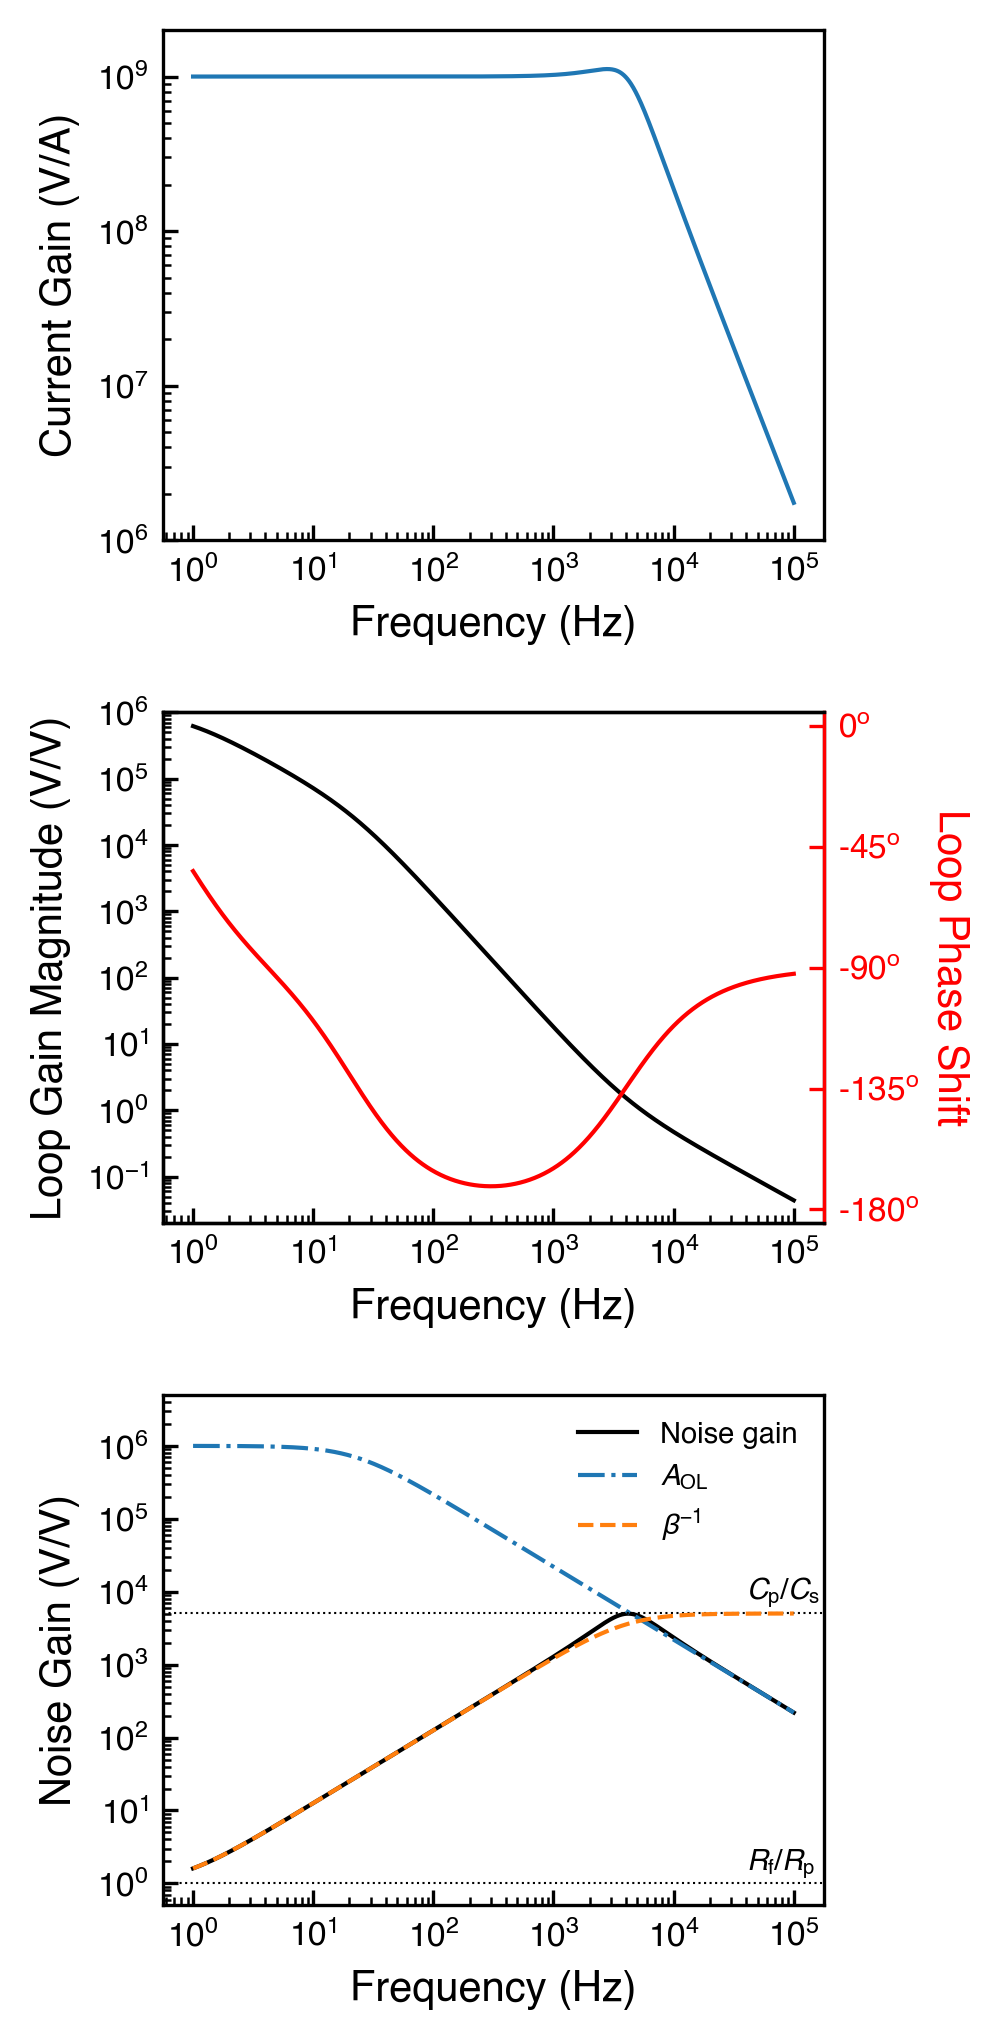

In [489]:
f = np.logspace(0,5,num=1000) # frequency range

Aol0 = 1e6 # DC open loop gain
GBP = 22e6 # Gain-bandwidth product
BW = 4e3 # amplifier bandwidth [Hz], determines Cf
Rf = 1e9 # feedback resistance [ohm]
Rs = 1e12 # source resistance [ohm]
Cs = 200e-12 # source capacitance [F]

fB = 0; Cf = 0; Zf = []; Rp = 0; Cp = 0; fP = 0; fF = 0
beta = []; loop_gain = []; signal_gain = []; noise_gain = []; Aol = []

def calculate_gains():
  global fB; global Cf; global Zf; global Rp;
  global Aol; global beta; global loop_gain; global signal_gain; global noise_gain;
  fB = GBP/Aol0 # opamp open loop bandwidth [Hz]
  Cf = 1/(Rf*2*np.pi*BW) # feedback capacitance [F]
  Zf = 1/(1/Rf+1j * 2*np.pi * f * Cf) # feedback impedance
  Rp = 1/(1/Rf+1/Rs) # parallel feedback+source resistance
  Cp = Cf+Cs # parallel feedback+source capacitance
  fP = 1/(2*np.pi*Rp*Cp) # zero frequency
  fF = 1/(2*np.pi*Rf*Cf) # pole frequency
  Aol = Aol0 / (1+1j*(f/fB)) # open loop gain
  
  beta = Rp/Rf / (1j * f / fP + 1) * (1j * f/fF + 1) 
  loop_gain = Aol*beta;
  signal_gain = -1/(1/Rf+(1j*2*np.pi*f*Cf)) / (1+1/loop_gain)
  noise_gain =  1/beta / (1+1/loop_gain)

calculate_gains()

plt.figure(figsize=(3.4, 6.9))
plt.subplot(311)
# plt.title('Signal gain ($R_s=10^{12}\\Omega\\gg R_f$)')
plt.loglog(f,np.abs(signal_gain), lw=1)
plt.ylabel('Current Gain (V/A)')
plt.xlabel('Frequency (Hz)')
plt.ylim(1e6, 2e9)
# print('DC signal gain = {:.0e} V/A'.format(Rf))
# print('Signal bandwidth = {:.0f} kHz'.format(BW/1e3))
# print('Feedback capacitance = {:.1e} F'.format(Cf))

ax1 = plt.subplot(312)
ax1.loglog(f,np.abs(loop_gain),'k', lw=1)
plt.xlabel('Frequency (Hz)')
ax1.set_ylabel('Loop Gain Magnitude (V/V)', color='k')
# ax1.axhline(1, color='k', ls=':', lw=0.5)
ax1.set_ylim(0.02, 1e6)
ax2 = ax1.twinx()
ax2.semilogx(f,np.angle(loop_gain)*360/(2*np.pi),'r', lw=1)
ax2.tick_params('y', colors='r')
ax2.spines['right'].set_color('red')
ax2.set_ylim(-185,5)
ax2.set_yticks(-np.arange(5)*45)
ax2.set_yticklabels(['0$^\mathrm{o}$', '-45$^\mathrm{o}$', '-90$^\mathrm{o}$', '-135$^\mathrm{o}$', '-180$^\mathrm{o}$'])
ax2.set_ylabel('Loop Phase Shift', color='r', rotation=270, labelpad=12)
plt.setp(ax2.get_yticklabels(), color="red")
# ax2.grid(0)
# plt.title('Loop gain ($R_s=10^{12}\\Omega\\gg R_f$)')
# fig.tight_layout()
# i = np.nonzero(np.abs(loop_gain)<1)[0][0]
# unity_gain_phase = np.angle(loop_gain[i-1])/2/np.pi*360
# print('Phase margin = {:.0f} degrees'.format(unity_gain_phase+180))

plt.subplot(313)
# plt.title('Noise gain ($R_s=10^{12}\\Omega\\gg R_f$)')
plt.loglog(f,np.abs(noise_gain),'k',label='Noise gain', lw=1)
plt.loglog(f,np.abs(Aol),'-.', label=r'$A_\mathrm{OL}$', lw=1)
plt.axhline(Rf * (1/Rf+1/Rs), color='k', ls='dotted', lw=0.5)
plt.axhline((Cf + Cs) / Cf, color='k', ls='dotted', lw=0.5)
plt.loglog(f,np.abs(1/beta),'--', label=r'$\beta^{-1}$', lw=1)
plt.text(4e4, 8e3, r'$C_\mathrm{p}/C_\mathrm{s}$', fontsize=7)
plt.text(4e4, 1.5, r'$R_\mathrm{f}/R_\mathrm{p}$', fontsize=7)
plt.ylabel('Noise Gain (V/V)')
plt.xlabel('Frequency (Hz)')
plt.ylim(0.5, 5e6)
plt.legend(fontsize=7, frameon=False, loc=1)
plt.tight_layout()
plt.savefig('figs/current_loop_noise_gain.eps')

## Fig. 20&21

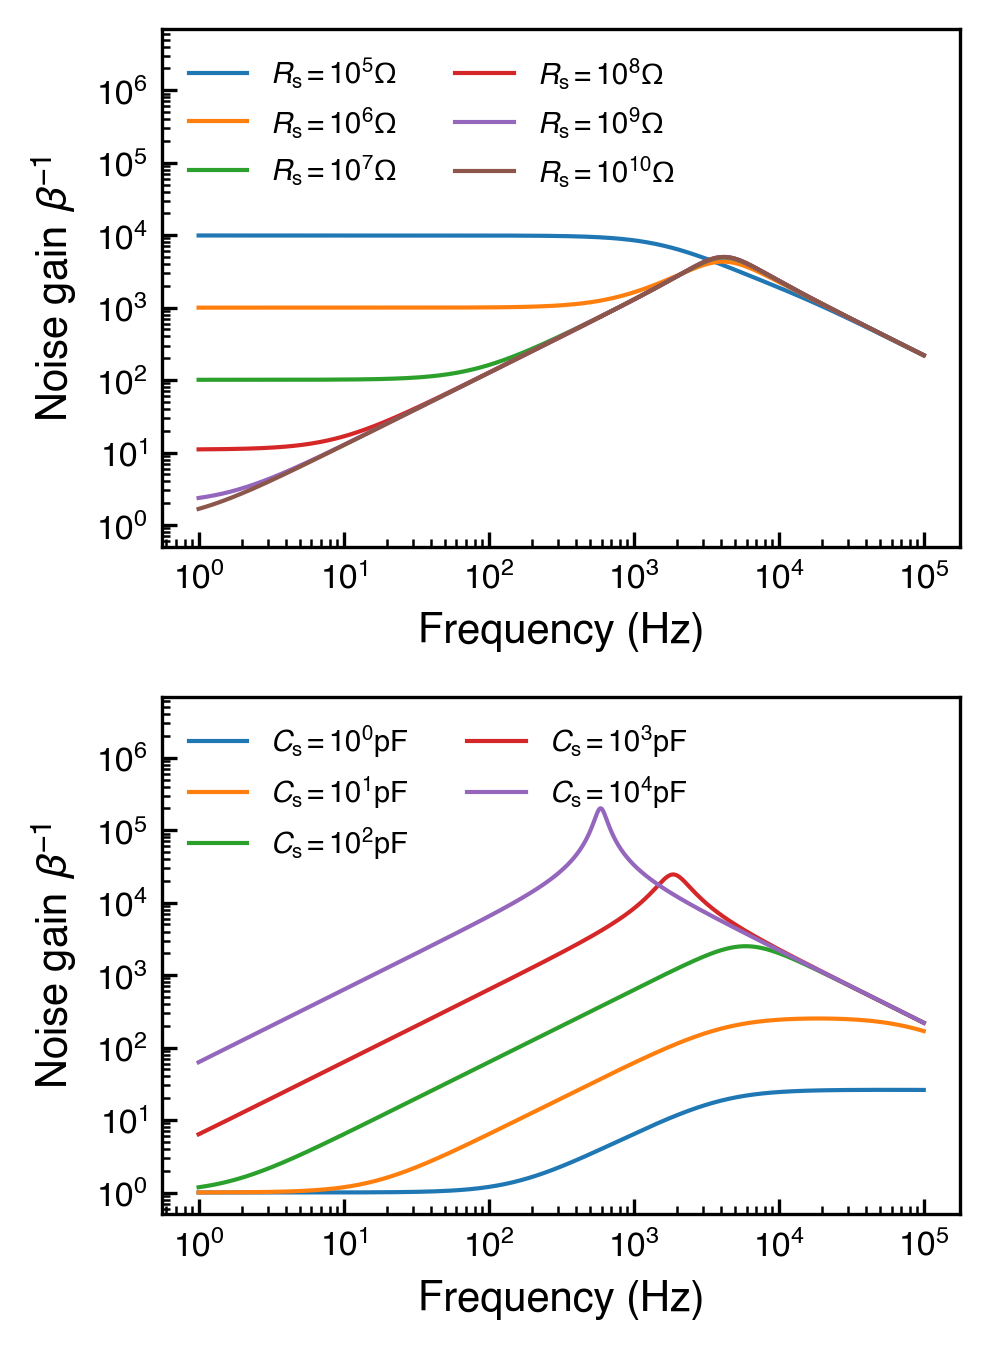

In [507]:
Rs_min = 5; # 1e5 ohm
Rs_max = 10; # 1e10 ohm
Cs = 200e-12 
fig = plt.figure(figsize=(3.4, 4.6))
plt.subplot(211)
for Rs in np.logspace(Rs_min,Rs_max,num=(Rs_max-Rs_min+1)):
  calculate_gains()
  plt.loglog(f,np.abs(noise_gain), label='$R_\mathrm{s}=10^{%d}\Omega$'%int(np.log10(Rs)), lw=1)
plt.ylabel(r'Noise gain $\beta^{-1}$')
plt.xlabel('Frequency (Hz)')
plt.legend(fontsize=7, frameon=False, ncol=2, loc=2)
plt.ylim(0.5, 7e6)

Rs = 1e12;
Cs_min = -12; # 1 pF
Cs_max = -8; # 10 nF
plt.subplot(212)
for Cs in np.logspace(Cs_min,Cs_max,num=(Cs_max-Cs_min+1)):
  calculate_gains()
  plt.loglog(f,np.abs(noise_gain), label='$C_\mathrm{s}=10^{%d}$pF'%(12+int(np.log10(Cs))), lw=1)
plt.ylabel(r'Noise gain $\beta^{-1}$')
plt.xlabel('Frequency (Hz)')
plt.legend(fontsize=7, frameon=False, ncol=2, loc=2)
plt.ylim(0.5, 7e6)
plt.tight_layout()
plt.savefig('figs/noise_gain_vs_rs_cs.eps')

## Fig. 22-23 

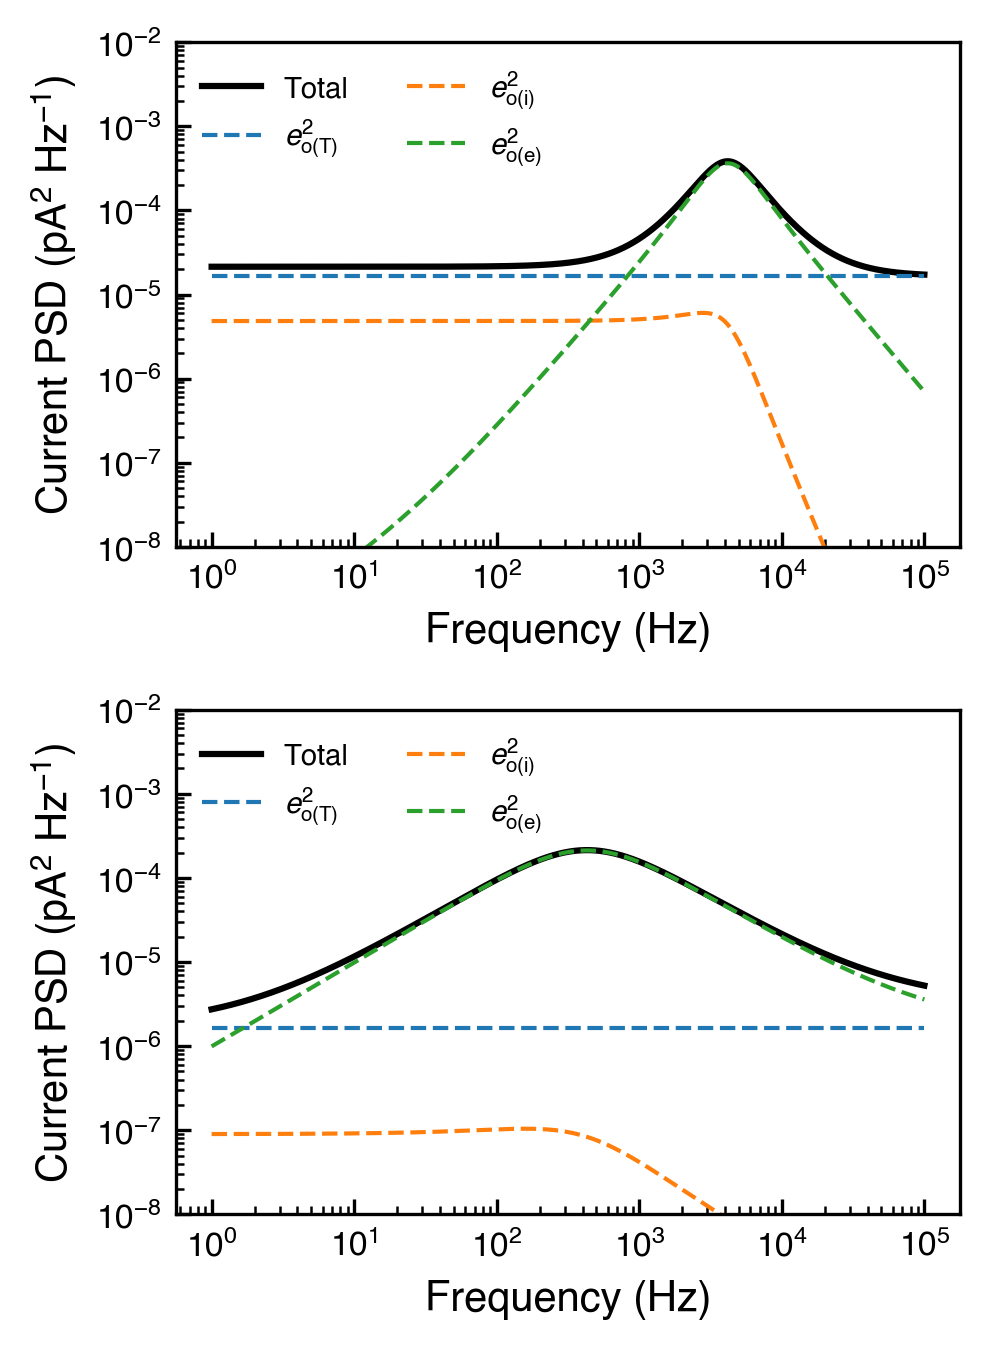

In [634]:
k = 1.38e-23 # m^2 kg s^-2 K^-1
T = 300 # K
f = np.logspace(0,5,num=1000) # frequency range

# OPA827
Aol0 = 1e6 # DC open loop gain
GBP = 22e6 # Gain-bandwidth product
Rf = 1e9 # feedback resistance [ohm]
Rs = 1e12 # source resistance [ohm]
BW = 4e3 # amplifier bandwidth [Hz]
Cs = 200e-12 # source capacitance [F]
i_n = 2.2e-15 # A/rtHz
f1 = 23; e_n = 3.8e-9 * np.sqrt(1 + f1/f) # V/rtHz 

Snn_T = []; Snn_i = []; Snn_e = []; Snn = []

def calculate_Snn():
  global Snn_T
  global Snn_i
  global Snn_e
  global Snn
  Snn_T = 4*k*T/(f*0+Rf)
  Snn_i = np.abs(i_n**2 * Zf**2 / Rf**2 / (1+1/loop_gain)**2)
  Snn_e = np.abs(e_n**2 / (beta*Rf)**2 / (1+1/loop_gain)**2)
  Snn = Snn_T + Snn_i + Snn_e
  
calculate_gains()
calculate_Snn()

plt.figure(figsize=(3.4, 4.6))
plt.subplot(211)
plt.loglog(f,Snn*1e24,'k',label='Total')
plt.loglog(f,Snn_T*1e24,'--',label='$e_\mathrm{o(T)}^2$', lw=1)
plt.loglog(f,Snn_i*1e24,'--',label='$e_\mathrm{o(i)}^2$', lw=1)
plt.loglog(f,Snn_e*1e24,'--',label='$e_\mathrm{o(e)}^2$', lw=1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Current PSD (pA$^{2}$ Hz$^{-1}$)')
# plt.title('$R_f=1G\Omega$, $BW=4kHz$, $C_s=200pF$')
plt.legend(fontsize=7, frameon=False, ncol=2, loc=2)
plt.ylim(1e-8,1e-2)


# OPA858
Aol0 = np.power(10,75/20) # DC open loop gain 75dB
GBP = 5.5e9 # Gain-bandwidth product
BW = 10e3 # Bandwidth [Hz]
Rf = 1e10 # feedback resistance [ohm]
f1 = 100e3; e_n = 2.5e-9 * np.sqrt(1 + f1/f) # V/rtHz
f2 = 500; i_n = .3e-15 * np.sqrt(1 + (f/f2)) # A/rtHz


calculate_gains()
calculate_Snn()

plt.subplot(212)
plt.loglog(f,Snn*1e24,'k',label='Total')
plt.loglog(f,Snn_T*1e24,'--',label='$e_\mathrm{o(T)}^2$', lw=1)
plt.loglog(f,Snn_i*1e24,'--',label='$e_\mathrm{o(i)}^2$', lw=1)
plt.loglog(f,Snn_e*1e24,'--',label='$e_\mathrm{o(e)}^2$', lw=1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Current PSD (pA$^{2}$ Hz$^{-1}$)')
# plt.title('$R_f=10G\Omega$, $BW=20kHz$, $C_s=200pF$')
plt.legend(fontsize=7, frameon=False, ncol=2, loc=2)
plt.ylim(1e-8,1e-2)
plt.tight_layout()
plt.savefig('figs/snn_examples.eps')

In [627]:
k = 1.38e-23 # m^2 kg s^-2 K^-1
T = 300 # K
# f = np.logspace(0,5,num=1000) # frequency range
f = np.arange(1, 1e5)
# OPA827
Aol0 = 1e6 # DC open loop gain
GBP = 22e6 # Gain-bandwidth product
Rf = 1e9 # feedback resistance [ohm]
Rs = 1e12 # source resistance [ohm]
BW = 4e3 # amplifier bandwidth [Hz]
Cs = 200e-12 # source capacitance [F]
i_n = 2.2e-15 # A/rtHz
f1 = 23; e_n = 3.8e-9 * np.sqrt(1 + f1/f) # V/rtHz 

Snn_T = []; Snn_i = []; Snn_e = []; Snn = []

def calculate_Snn():
  global Snn_T
  global Snn_i
  global Snn_e
  global Snn
  Snn_T = 4*k*T/(f*0+Rf)
  Snn_i = np.abs(i_n**2 * Zf**2 / Rf**2 / (1+1/loop_gain)**2)
  Snn_e = np.abs(e_n**2 / (beta*Rf)**2 / (1+1/loop_gain)**2)
  Snn = Snn_T + Snn_i + Snn_e
  
calculate_gains()
calculate_Snn()
print('Integrated current noise: %.2f pA'%(1e12*np.sqrt(sum(Snn*(f[1]-f[0])))))
# OPA858
Aol0 = np.power(10,75/20) # DC open loop gain 75dB
GBP = 5.5e9 # Gain-bandwidth product
BW = 10e3 # Bandwidth [Hz]
Rf = 1e10 # feedback resistance [ohm]
f1 = 100e3; e_n = 2.5e-9 * np.sqrt(1 + f1/f) # V/rtHz
f2 = 500; i_n = .3e-15 * np.sqrt(1 + (f/f2)) # A/rtHz
calculate_gains()
calculate_Snn()
print('Integrated current noise: %.2f pA'%(1e12*np.sqrt(sum(Snn*(f[1]-f[0])))))

Integrated current noise: 2.03 pA
Integrated current noise: 1.15 pA


## Fig. 24

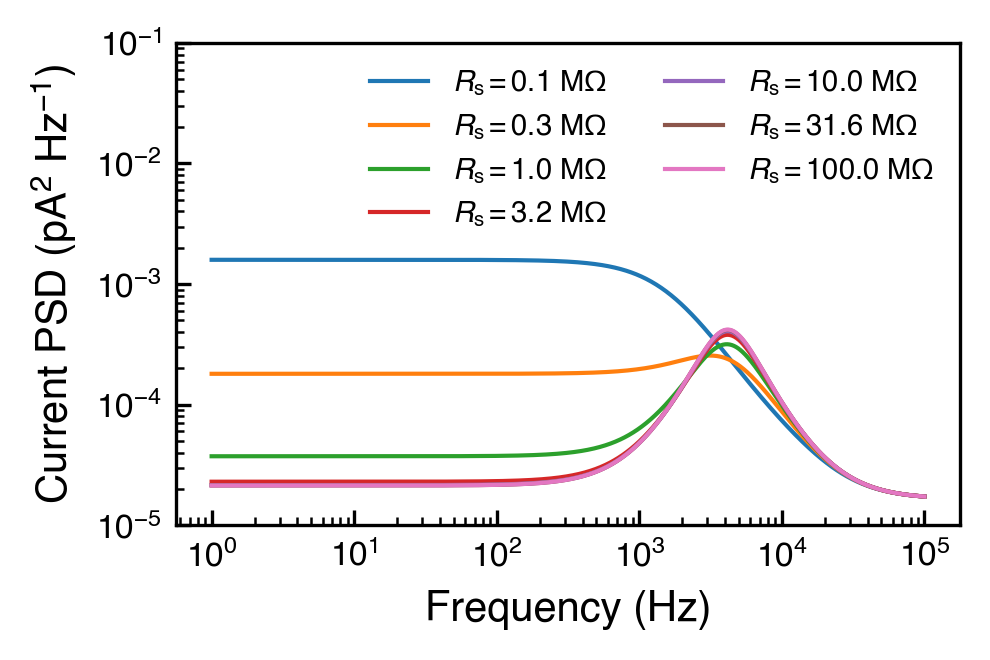

In [670]:
Rs_min = 5; # 1e5 ohm
Rs_max = 8; # 1e9 ohm

Aol0 = 1e6 # DC open loop gain
GBP = 22e6 # Gain-bandwidth product
Rf = 1e9 # feedback resistance [ohm]
Rs = 1e12 # source resistance [ohm]
BW = 4e3 # amplifier bandwidth [Hz]
Cs = 200e-12 # source capacitance [F]
i_n = 2.2e-15 # A/rtHz
# f1 = 23; e_n = 3.8e-9 * np.sqrt(1 + f1/f) # V/rtHz 
e_n = 4e-9 # V/rtHz 

fig = plt.figure(figsize=(3.4, 2.3))
for Rs in np.logspace(Rs_min,Rs_max,num=7):
  calculate_gains()
  calculate_Snn()
  plt.loglog(f,Snn*1e24, label='$R_\mathrm{s}=$%.1f M$\Omega$'%(Rs/1e6), lw=1)
plt.legend(fontsize=7, frameon=False, ncol=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Current PSD (pA$^2$ Hz$^{-1}$)')
# plt.title('$R_f=1G\Omega, BW=4kHz$')
plt.ylim(1e-5,1e-1)
plt.tight_layout()
plt.savefig('figs/snn_vs_rs.eps')

## Fig. 25 

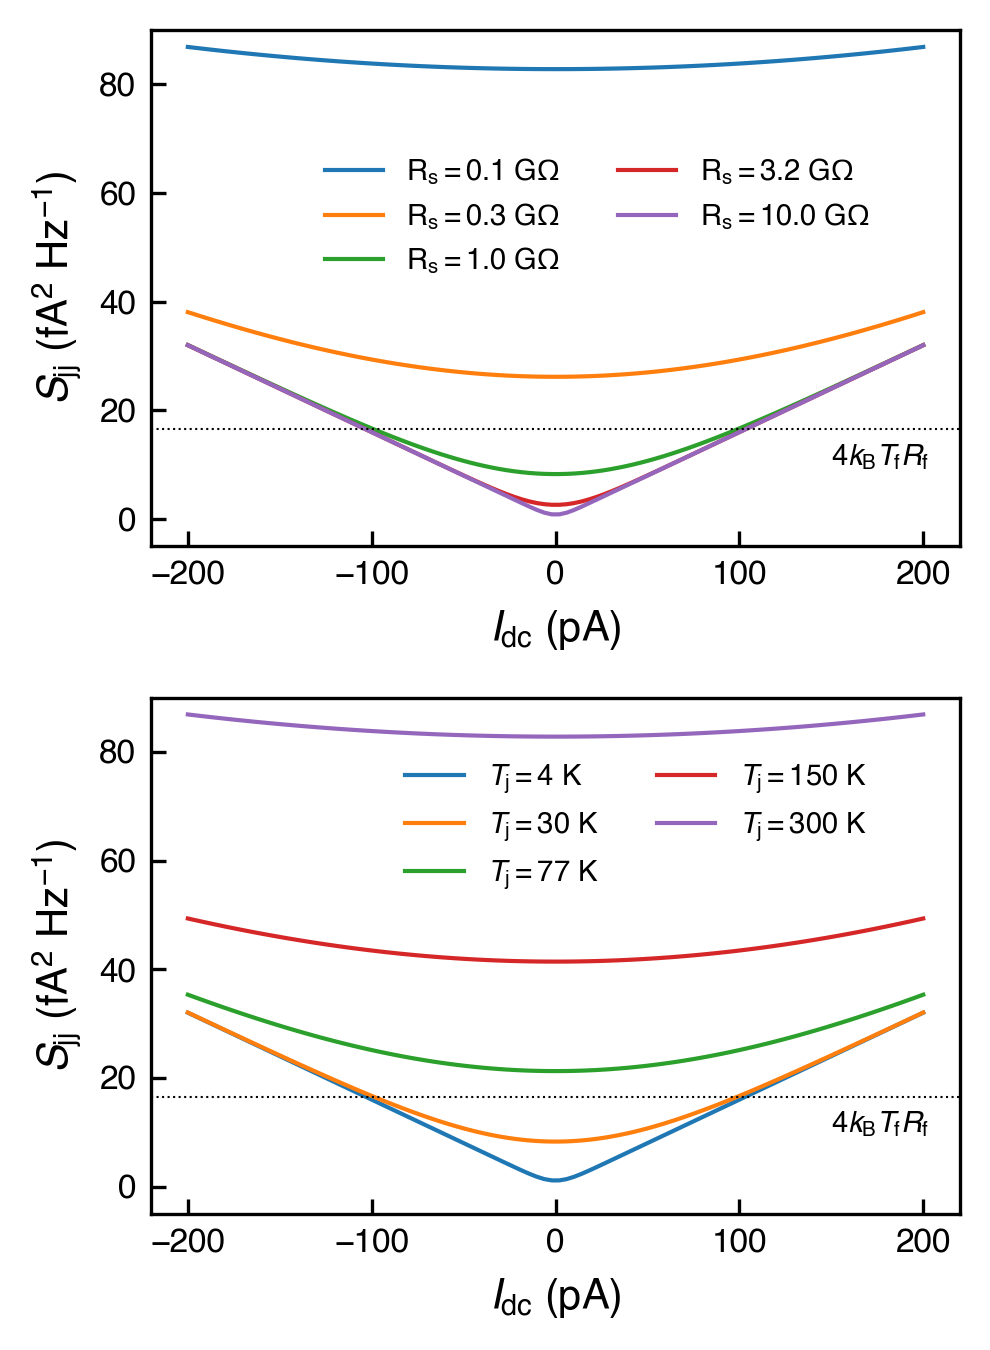

In [675]:
elch = 1.6e-19 #C
kb = 1.38e-23 #J/K
Tf = 300 #K
Rf = 1e9 #V/A
Snn_r = 4*kb*300/Rf
def Sjj(Idc, Rs, Ts):  
  return elch*Idc/np.tanh(elch*Idc*Rs/2/kb/Ts)
Ts = np.array([4, 30, 77, 150, 300])
Idc = np.linspace(-200, 200, 100) #pA
Rs = np.logspace(8, 10, 5)
fig = plt.figure(figsize=(3.4, 4.6))
ax1 = plt.subplot(211)
for r in Rs:
  ax1.plot(Idc, Sjj(Idc*1e-12, r, Ts[-1])*1e30, label=r'R$_\mathrm{s}=$%.1f G$\Omega$'%(r/1e9), lw=1)
ax1.axhline(Snn_r*1e30, color='k', ls=':', lw=0.5)
ax1.text(150, 10, '$4k_\mathrm{B}T_\mathrm{f}R_\mathrm{f}$', fontsize=7)
# ax1.set_yscale('log')
# ax1.set_xscale('symlog')
ax1.legend(fontsize=7, frameon=False, ncol=2, loc=(0.2, 0.5))
# plt.title('T={:.0f}K'.format(Ts[-1]))
plt.xlabel('$I_\mathrm{dc}$ (pA)')
plt.ylabel('$S_\mathrm{jj}$ (fA$^2$ Hz$^{-1}$)')
# ax1.set_xlim(-50, 50)
ax1.set_ylim(-5, 90)
ax2 = plt.subplot(212)
for t in Ts:
  ax2.plot(Idc, Sjj(Idc*1e-12, Rs[-5], t)*1e30, label='$T_\mathrm{j}=$%d K'%(t), lw=1)
ax2.axhline(Snn_r*1e30, color='k', ls=':', lw=0.5)
ax2.text(150, 10, '$4k_\mathrm{B}T_\mathrm{f}R_\mathrm{f}$', fontsize=7)
ax2.legend(fontsize=7, frameon=False, ncol=2, loc=(0.3, 0.6))
plt.xlabel('$I_\mathrm{dc}$ (pA)')
plt.ylabel('$S_\mathrm{jj}$ (fA$^2$ Hz$^{-1}$)')
# ax2.set_xlim(-50, 50)
ax2.set_ylim(-5, 90)
# plt.title('Rs={:.1f}GOhm'.format(Rs[-5]/1e9))
plt.tight_layout()
plt.savefig('figs/sjj_vs_rs_T.eps')